# Capstone Project 3: 
## Part III: Data Modeling

In Part III of the project, we will use the modeling data saved at the end of Part II.

For modeling we will use data_a; we will create a target feature and will build a model using this data. Predictions will be made with the best model using the records from Data (A) and Data (B) which have ‘Time Posted’ of 1 day.

In [1]:
# Import relevant libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.8)

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load saved data for modeling

data_a = pd.read_excel('data/jobs_ds_s1_s5_a_model.xlsx')
data_b = pd.read_excel('data/jobs_ds_s1_s5_b_model.xlsx')

In [4]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             1513 non-null   object
 1   Industry              1513 non-null   object
 2   Job Function          1513 non-null   object
 3   Metro Area            1513 non-null   object
 4   Education-Bachelor    1513 non-null   int64 
 5   Education-Master      1513 non-null   int64 
 6   Education-Doctor      1513 non-null   int64 
 7   Seniority Level       1513 non-null   object
 8   Relevance             1513 non-null   int64 
 9   Time Posted           1513 non-null   int64 
 10  Number of Applicants  1513 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 130.1+ KB


In [5]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             3364 non-null   object
 1   Industry              3364 non-null   object
 2   Job Function          3364 non-null   object
 3   Metro Area            3364 non-null   object
 4   Education-Bachelor    3364 non-null   int64 
 5   Education-Master      3364 non-null   int64 
 6   Education-Doctor      3364 non-null   int64 
 7   Seniority Level       3364 non-null   object
 8   Relevance             3364 non-null   int64 
 9   Time Posted           3364 non-null   int64 
 10  Number of Applicants  3364 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 289.2+ KB


## III.1 Modeling Data Processing, Creating Target Feature, and Data Selection

Since we are interested in the postings with the smallest number of applicants, it is clear that for modeling we can use only Data A which has known 'Number of Applicants' values. In order to be able to adequately compare all postings, a new feature 'Applicants per Day' will be created.

In [6]:
data_a.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Time Posted,Number of Applicants
0,Data Scientist,Staffing and Recruiting,Engineering,ATL,0,1,1,entry,3,2,40
1,Data Scientist,Financial Services,Engineering,ATL,0,0,0,entry,2,1,25
2,Data Scientist,Financial Services,Engineering,ATL,0,1,0,entry,2,1,29
3,Data Scientist,Construction,Engineering,ATL,0,1,0,entry,3,2,27
4,Data Scientist,Internet,Engineering,ATL,0,0,0,entry,2,5,192


- **Data Selection**

From Section II, we recall that there were several records with 'Time Posted' value of 0. Let's examine these records.

In [7]:
# check the number of records with 'Time Posted' values of 0
print('Number of records with Time Posted = 0: ', len(data_a[data_a['Time Posted'] == 0]))

Number of records with Time Posted = 0:  3


In [8]:
# display these records

data_a[data_a['Time Posted'] == 0]

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Time Posted,Number of Applicants
169,Machine Learning Engineer,Staffing and Recruiting,Research,DC,0,1,1,senior,4,0,161
588,Data Engineer,Internet,Engineering,CHI,1,1,0,associate,2,0,200
930,Data Engineer,Internet,Engineering,CHI,1,1,0,associate,2,0,200


There are only three out 1513 records with 'Time Posted' values of 0. All of these have a large number of applicants which makes them extreme outliers. Therefore, we can eliminate these records without losing essential information.

In [9]:
# eliminate the records with 'Time Posted' = 0 and create new data set data_1
data_a = data_a[data_a['Time Posted'] != 0]
data_a.reset_index(inplace = True, drop = True)
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             1510 non-null   object
 1   Industry              1510 non-null   object
 2   Job Function          1510 non-null   object
 3   Metro Area            1510 non-null   object
 4   Education-Bachelor    1510 non-null   int64 
 5   Education-Master      1510 non-null   int64 
 6   Education-Doctor      1510 non-null   int64 
 7   Seniority Level       1510 non-null   object
 8   Relevance             1510 non-null   int64 
 9   Time Posted           1510 non-null   int64 
 10  Number of Applicants  1510 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 129.9+ KB


Since we have eliminated the zero values in 'Time Posted', we can now create the new feature 'Applicants per Day'.

In [10]:
# create new feature 'Applicants per Day'
data_a['Applicants per Day'] = (data_a['Number of Applicants'] / data_a['Time Posted']).astype(int)
data_a.head(10)

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Time Posted,Number of Applicants,Applicants per Day
0,Data Scientist,Staffing and Recruiting,Engineering,ATL,0,1,1,entry,3,2,40,20
1,Data Scientist,Financial Services,Engineering,ATL,0,0,0,entry,2,1,25,25
2,Data Scientist,Financial Services,Engineering,ATL,0,1,0,entry,2,1,29,29
3,Data Scientist,Construction,Engineering,ATL,0,1,0,entry,3,2,27,13
4,Data Scientist,Internet,Engineering,ATL,0,0,0,entry,2,5,192,38
5,Data Scientist,Real Estate,Engineering,ATL,1,1,0,entry,4,3,86,28
6,Data Scientist,Banking,Engineering,ATL,0,1,0,entry,2,3,35,11
7,Data Scientist,Financial Services,Engineering,ATL,0,1,0,entry,2,2,37,18
8,Data Scientist,Financial Services,Engineering,ATL,0,1,1,entry,2,3,40,13
9,Data Scientist,Transportation,Science,AUS,1,1,1,entry,2,3,176,58


    - Examine the value counts of 'Time Posted'

In [11]:
count_posted = data_a['Time Posted'].value_counts()
print(count_posted)

4    285
1    272
5    268
3    226
6    183
2    163
7    113
Name: Time Posted, dtype: int64


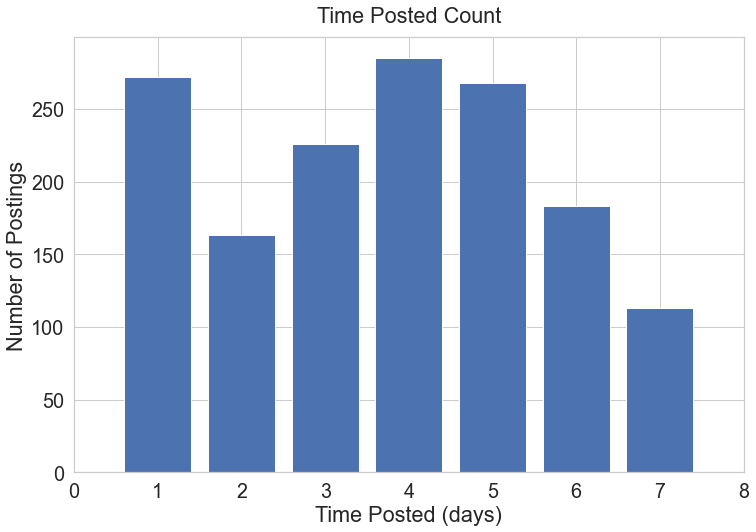

In [12]:
# visualize with a barplot

d_x = 1
x_min = 0
x_max = count_posted.index.max() + d_x
x_ticks = np.arange(x_min, x_max + d_x, d_x)


plt.figure(figsize = (12, 8))
plt.bar(count_posted.index, count_posted.values)
plt.xticks(x_ticks)
plt.xlabel('Time Posted (days)')
plt.ylabel('Number of Postings')
plt.title('Time Posted Count', pad = 15)

plt.show()

As evident from the plot, there is not one dominant 'Time Posted' value. We would like to determine next whether the 'Applicants per Day' distributions for different 'Time Posted' values are similar or have significant differences.

In [13]:
# define a function to plot the 'Applicants per Day' histogram for different 'Time Posted' values

feat_select = 'Time Posted'
val_select = 1

feat_hist = 'Applicants per Day'

bin_size = 5

# define function
def plot_hist_select(data, feat_select, val_select, feat_hist, bin_size):
    
    data_hist = data[data[feat_select] == val_select][feat_hist]
    n_bins = int((data_hist.max() - data_hist.min()) // bin_size) # make sure to define it as an integer
        
    plt.figure(figsize = (14, 10))
    plt.hist(data_hist, bins = n_bins)
    plt.xlim(0, 200)
    plt.xticks(np.arange(0, 240 , 20))
    plt.xlabel('Applicants per Day')
    plt.ylabel('Number of Postings')
    plt.title('Histogram of Applicants per Day: ' + feat_select + ' = ' + str(val_select), pad = 20)
    
    plt.show()

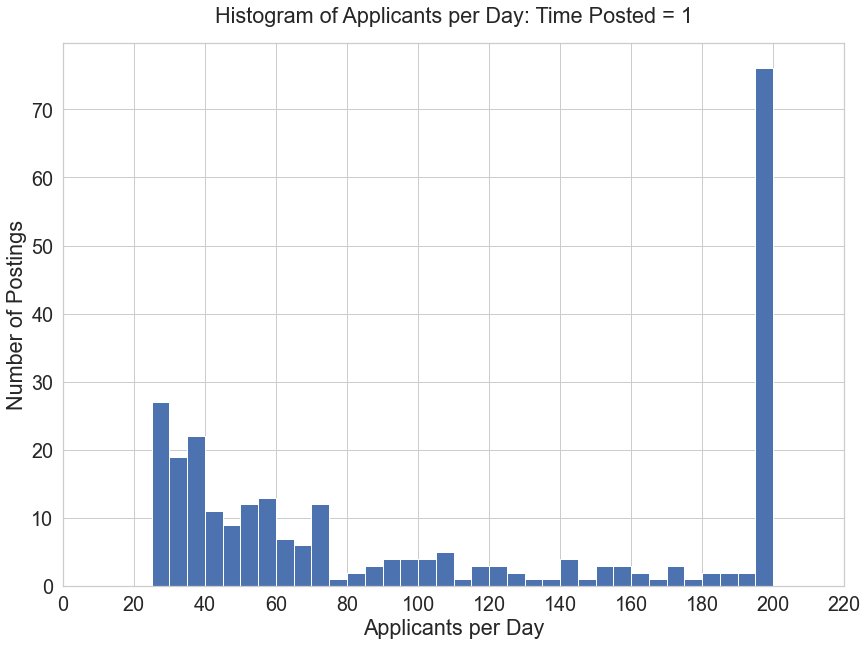

In [14]:
val_select = 1
bin_size = 5

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

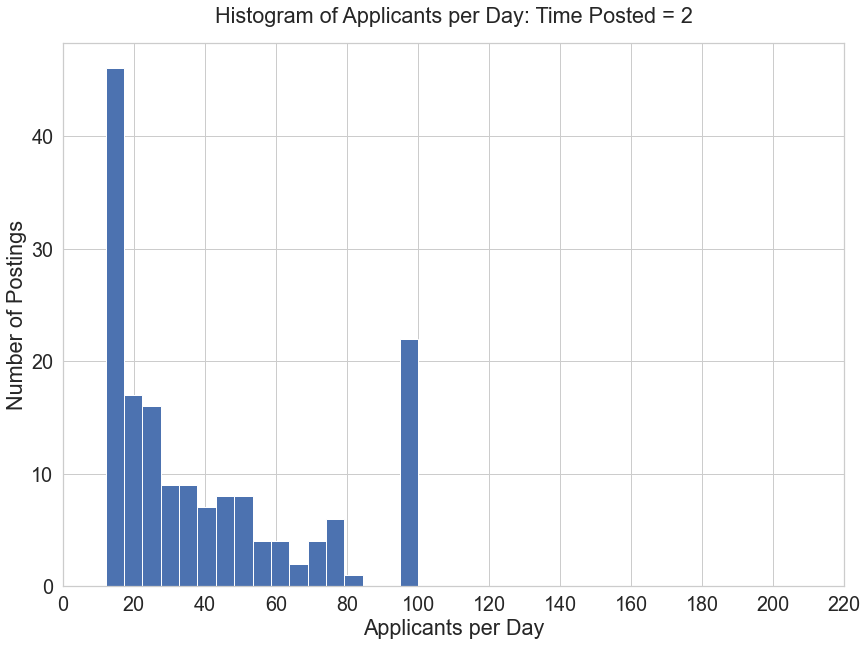

In [15]:
val_select = 2

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

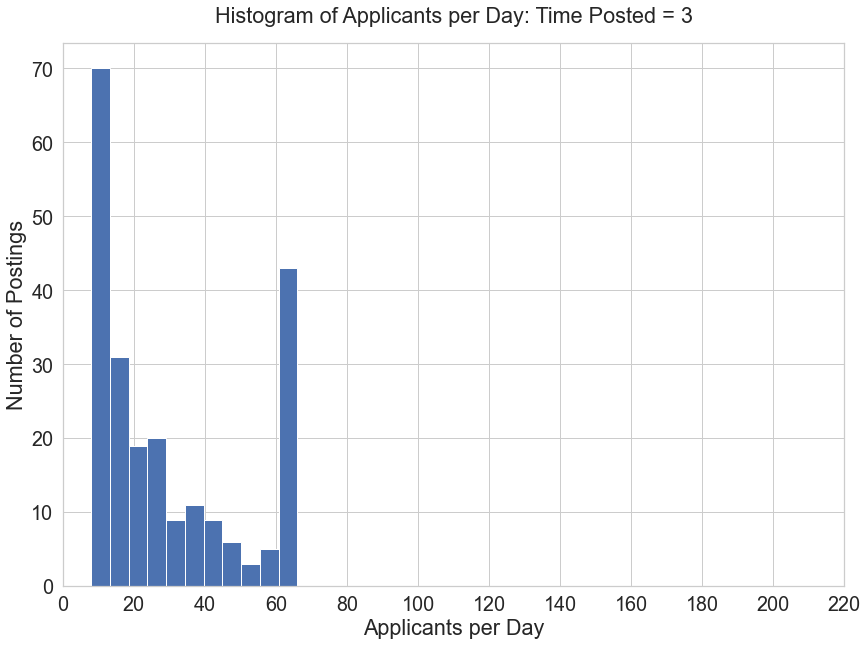

In [16]:
val_select = 3

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

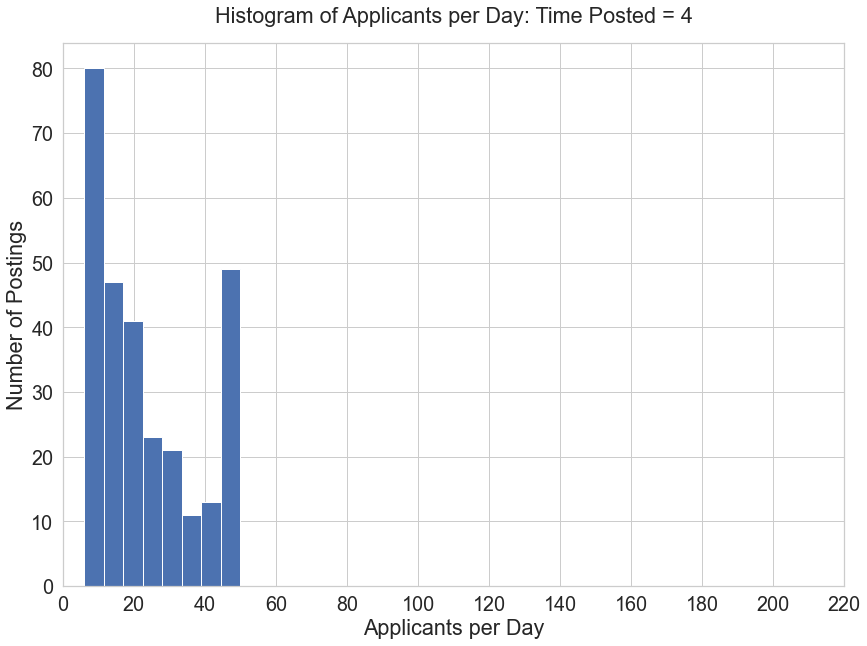

In [17]:
val_select = 4

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

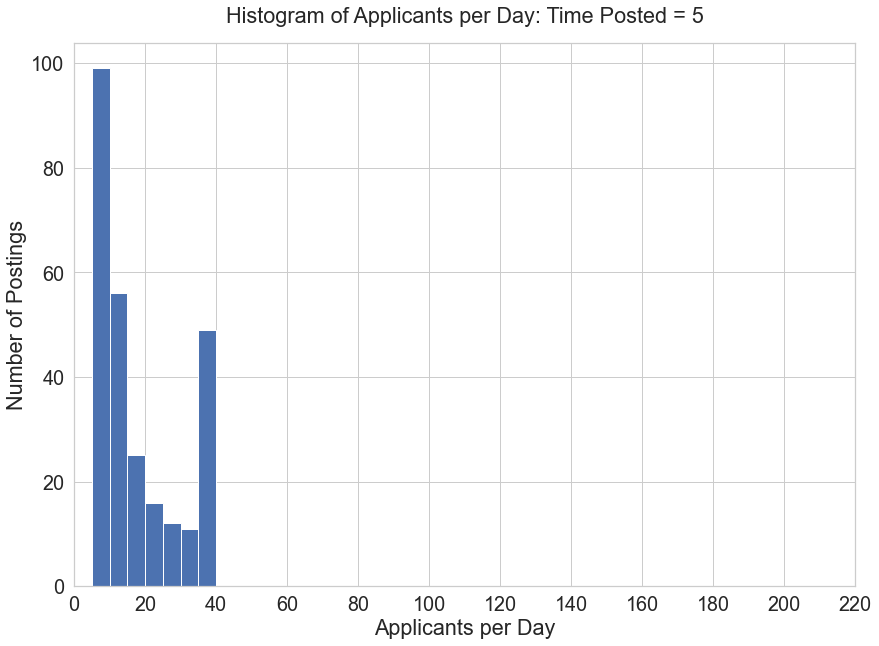

In [18]:
val_select = 5

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

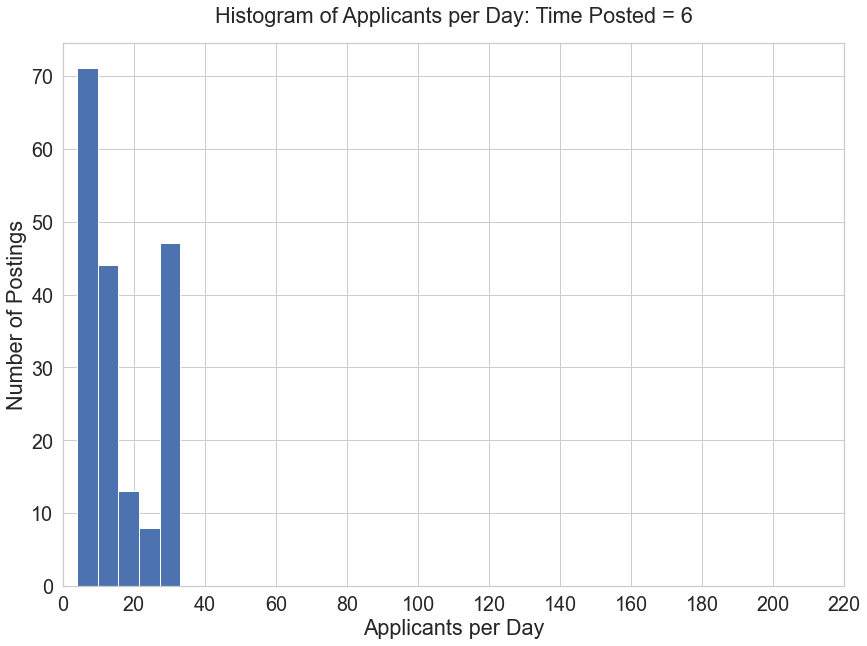

In [19]:
val_select = 6

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

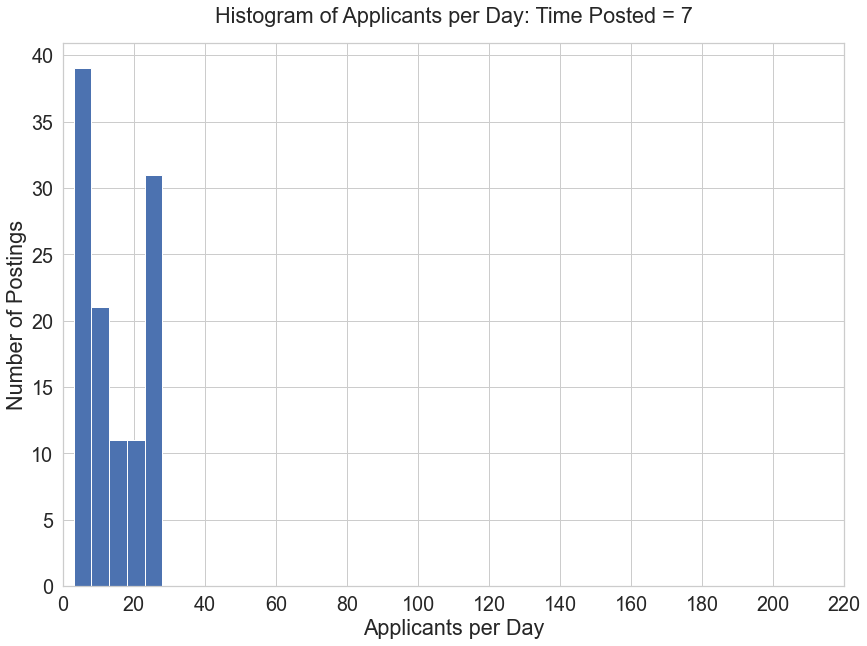

In [20]:
val_select = 7

plot_hist_select(data_a, feat_select, val_select, feat_hist, bin_size)

The histograms obtained show that the 'Applicants per Day' distributions vary significantly and systematically with the increase of the 'Time Posted'. It is therefore clear that for modeling one cannot treat the data with time posted of one in the same way as data with time posted of six or seven for example. 

The goal is to use data in the model which has the same target behavior. Although there are certain similarities in the histograms for some of the time posted values, we need a quantitative measure in order to determine the closest target behavior. In order to achieve this, we will create and examine the 'Applicants per Day' Cumulative Distribution Functions (CDF) for different 'Time Posted' values.

In [21]:
# define function to plot CDFs

feat_select = 'Time Posted'

list_val_select = [1, 2, 3 , 4, 5, 6, 7]

feat_critical = 'Applicants per Day'

x_max = 75 # allow for chaging the axis limits
y_max = 90
legend_box_y = 0.8

c_alpha = 0.2

def plot_cdf(data, feat_select, list_val_select, feat_critical, x_max, y_max, legend_box_y, c_alpha):
    
    plt.figure(figsize = (14, 10))
    
    for item in list_val_select:
        
        p_below = []
        
        a_select = data[data[feat_select] == item][feat_critical]
        a_range = np.arange(a_select.min()+1, x_max+5, 1)
        
        for x in a_range:
            
            p_below.append(len(a_select[a_select <= x]) * 100 / len(a_select))
            
        plt.scatter(a_range, p_below, s = 100, alpha = c_alpha, label = feat_select + ' = ' + str(item))
        plt.legend(loc = 'center left', bbox_to_anchor = (1.0, legend_box_y))
        
    plt.ylim(0, y_max)
    plt.xlabel('Applicants per Day Threshold')
    plt.ylabel('Percentage of Data below Threshold')

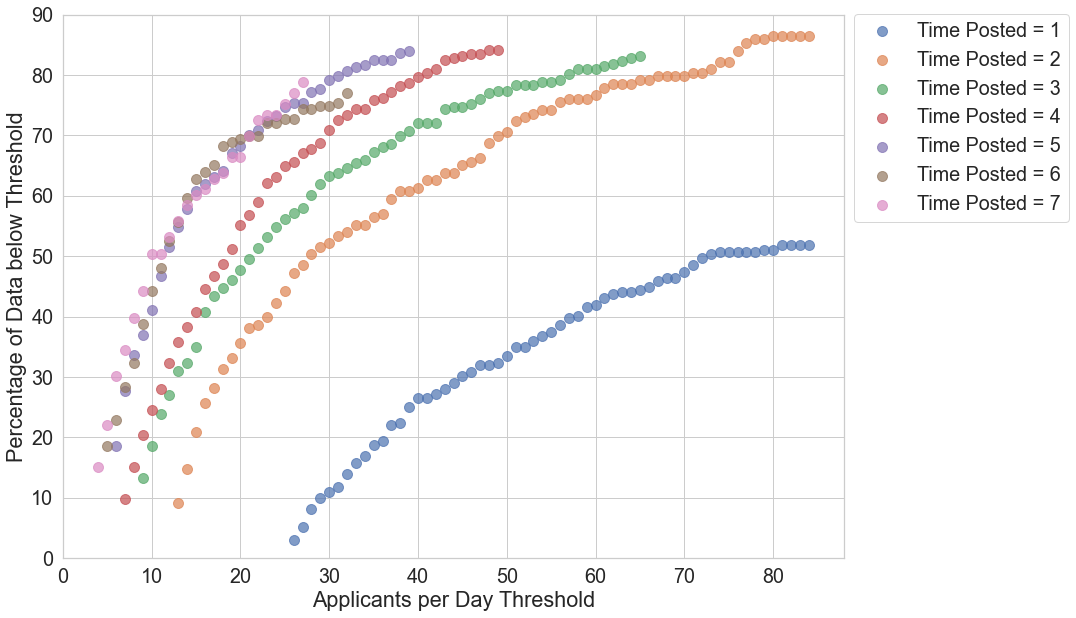

In [22]:
x_max = 80
legend_box_y = 0.81
c_alpha = 0.7

plot_cdf(data_a, feat_select, list_val_select, feat_critical, x_max, y_max, legend_box_y, c_alpha)

This is the most important result concerning adequate selection of data to be used for modeling. 

The plot shows a clear trend in the behavior of 'Applicants per Day' as the time posted increases. Most applications occur during the first day of posting with a steady decrease of the number of applicants with each consecutive day. This is something one would naturally expect. However, the plot provides clear indication that in terms of applicants per day behavior the records with time posted of 5, 6, and 7 can be treated as one. Thus, these records will comprise the data subset to be used for modeling.

In [23]:
# select corresponding data and create new data set, data_m

list_posted = [5, 6, 7]

mask_posted = data_a['Time Posted'].isin(list_posted)

data_m = data_a[mask_posted].copy()
data_m.reset_index(inplace = True, drop = True)

data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             564 non-null    object
 1   Industry              564 non-null    object
 2   Job Function          564 non-null    object
 3   Metro Area            564 non-null    object
 4   Education-Bachelor    564 non-null    int64 
 5   Education-Master      564 non-null    int64 
 6   Education-Doctor      564 non-null    int64 
 7   Seniority Level       564 non-null    object
 8   Relevance             564 non-null    int64 
 9   Time Posted           564 non-null    int64 
 10  Number of Applicants  564 non-null    int64 
 11  Applicants per Day    564 non-null    int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 50.8+ KB


After selecting the data with time posted values of 5, 6 , and 7 there are 564 number of data points which will be used for modeling.

- **Creating Target Feature**

We note that using 'Applicants per Day' as a target variable in our model is not the best approach. The better approach is to pick an appropriate threshold and divide the data into two classes: 
- Class 1: 'Applicants per Day' below threshold
- Class 2: 'Applicants per Day' above threshold

Please, note that since we are interested only in the position with a small number of applicants a more detailed data segmentation is unnecessary.

From the CDF plot above, a threshold of 8 applicants per day which puts approximately 33% of the data points in Class 1 appears appropriate.

In [24]:
# create target feature 'Position Demand'

data_m['Position Demand'] = 0

data_m.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Time Posted,Number of Applicants,Applicants per Day,Position Demand
0,Data Scientist,Internet,Engineering,ATL,0,0,0,entry,2,5,192,38,0
1,Data Scientist,Staffing and Recruiting,Engineering,BOS,1,1,0,entry,1,6,30,5,0
2,Data Scientist,Financial Services,Engineering,CHI,1,1,0,entry,2,5,200,40,0
3,Data Scientist,Automotive,Engineering,DAL,0,0,0,entry,2,5,33,6,0
4,Data Scientist,Internet,Engineering,HOU,0,0,0,entry,1,5,200,40,0


In [25]:
# fill in the appropriate values according to 8 applicants per day threshold
n_appl = 0

n_cut = 8 # class boundary

for i in range(len(data_m)):
    n_appl = data_m['Applicants per Day'][i]
    
    if n_appl < n_cut + 1:
        data_m['Position Demand'][i] = 1
    else:
        data_m['Position Demand'][i] = 2

In [26]:
# get the data ratio after the split
count_demand = data_m['Position Demand'].value_counts(normalize = True) * 100
print(round(count_demand, 2))

2    65.6
1    34.4
Name: Position Demand, dtype: float64


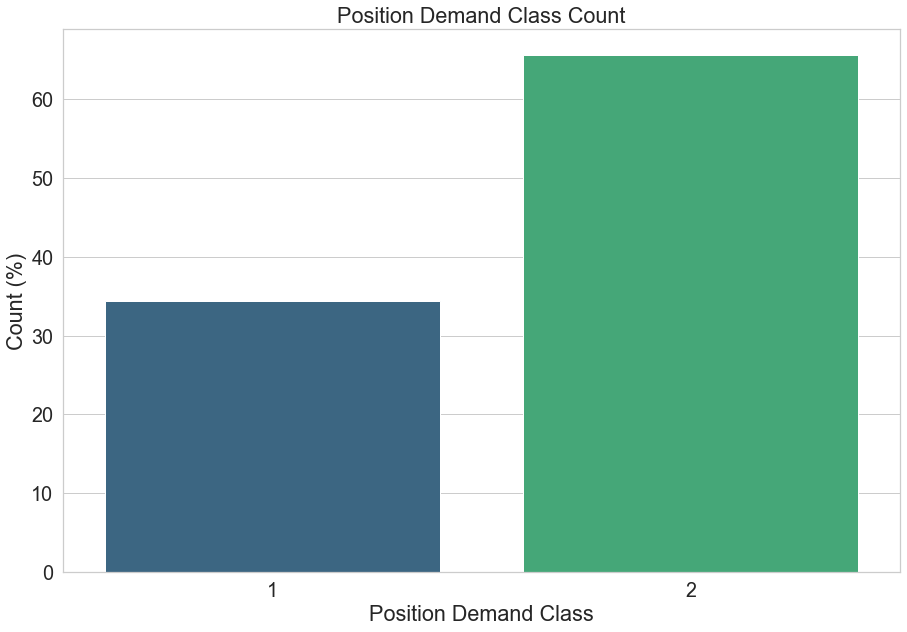

In [27]:
# visualize in a plot

plt.figure(figsize = (15, 10))
sns.barplot(x = count_demand.index, y = count_demand.values, palette = 'viridis')
plt.xlabel('Position Demand Class')
plt.ylabel('Count (%)')
plt.title('Position Demand Class Count')

plt.show()

As intended, a class boundary value of 8 applicants per day provides data partitioning of 34.4% and 65.5% in Class 1 and 2, respectively.

### Replacing non-numerical with numerical categorical values

Before proceeding with modeling, we need to replace the current non-numerical categorical values with numerical categorical values in 'Job Title', 'Industry', 'Job Function', 'Metro Area', and 'Seniority Level'. We will do that both for the modeling data and the data which we will make predictions with. The data to be used for predictions will be the portions with 'Time Posted' of 1 day from both Data A and Data B.

In [28]:
# select data for predictions from data_a

data_pred_a = data_a[data_a['Time Posted'] == 1].copy()

data_pred_a.reset_index(inplace = True, drop = True)
data_pred_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             272 non-null    object
 1   Industry              272 non-null    object
 2   Job Function          272 non-null    object
 3   Metro Area            272 non-null    object
 4   Education-Bachelor    272 non-null    int64 
 5   Education-Master      272 non-null    int64 
 6   Education-Doctor      272 non-null    int64 
 7   Seniority Level       272 non-null    object
 8   Relevance             272 non-null    int64 
 9   Time Posted           272 non-null    int64 
 10  Number of Applicants  272 non-null    int64 
 11  Applicants per Day    272 non-null    int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 24.6+ KB


In [29]:
# select data for predictions from data_b

data_pred_b = data_b[data_b['Time Posted'] == 1].copy()

data_pred_b.reset_index(inplace = True, drop = True)
data_pred_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Title             966 non-null    object
 1   Industry              966 non-null    object
 2   Job Function          966 non-null    object
 3   Metro Area            966 non-null    object
 4   Education-Bachelor    966 non-null    int64 
 5   Education-Master      966 non-null    int64 
 6   Education-Doctor      966 non-null    int64 
 7   Seniority Level       966 non-null    object
 8   Relevance             966 non-null    int64 
 9   Time Posted           966 non-null    int64 
 10  Number of Applicants  966 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 83.1+ KB


In [30]:
data_m.columns

Index(['Job Title', 'Industry', 'Job Function', 'Metro Area',
       'Education-Bachelor', 'Education-Master', 'Education-Doctor',
       'Seniority Level', 'Relevance', 'Time Posted', 'Number of Applicants',
       'Applicants per Day', 'Position Demand'],
      dtype='object')

In [31]:
# select appropriate features for modeling --> drop 'Time Posted', 'Number of Applicants', and 'Applicants per Day'

feat_model = ['Job Title', 'Industry', 'Job Function', 'Metro Area', 'Education-Bachelor', 'Education-Master', 
             'Education-Doctor', 'Seniority Level', 'Relevance', 'Position Demand']

data_m = data_m[feat_model]
data_m.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,Data Scientist,Internet,Engineering,ATL,0,0,0,entry,2,2
1,Data Scientist,Staffing and Recruiting,Engineering,BOS,1,1,0,entry,1,1
2,Data Scientist,Financial Services,Engineering,CHI,1,1,0,entry,2,2
3,Data Scientist,Automotive,Engineering,DAL,0,0,0,entry,2,1
4,Data Scientist,Internet,Engineering,HOU,0,0,0,entry,1,2


In [32]:
# select appropriate features for predictiong --> 
# drop 'Time Posted', 'Number of Applicants', 'Applicants per Day', 'Position Demand'

feat_pred = ['Job Title', 'Industry', 'Job Function', 'Metro Area', 'Education-Bachelor', 'Education-Master', 
             'Education-Doctor', 'Seniority Level', 'Relevance']

In [33]:
# data_pred_a

data_pred_a = data_pred_a[feat_pred]
data_pred_a.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance
0,Data Scientist,Financial Services,Engineering,ATL,0,0,0,entry,2
1,Data Scientist,Financial Services,Engineering,ATL,0,1,0,entry,2
2,Data Scientist,Medical Devices,Engineering,BOS,1,1,0,entry,3
3,Data Scientist,Financial Services,Information Technology,LA,0,0,0,entry,3
4,Data Scientist,Marketing and Advertising,Engineering,NY,0,0,0,entry,4


In [34]:
# data_pred_b

data_pred_b = data_pred_b[feat_pred]
data_pred_b.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance
0,Data Scientist,Staffing and Recruiting,Information Technology,ATL,1,1,0,entry,1
1,Data Scientist,Research,Analyst,ATL,0,0,0,entry,2
2,Data Scientist,Defense,Engineering,ATL,1,0,0,entry,3
3,Data Scientist,Staffing and Recruiting,Information Technology,ATL,1,0,0,entry,2
4,Data Scientist,Marketing and Advertising,Engineering,ATL,0,0,0,entry,3


Now, it's time to replace the non-numerical categorical values with numerical. 

Please, note that we will only use the categorical values which are present in the modeling data and eliminate the rest where applicable (the model cannot predict something it has not learned)!

- **Replacing 'Job Title' Values**

In [35]:
# get value count as percentages
feat = 'Job Title'

count_feat = data_m[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

Data Scientist                 59.40
Machine Learning Engineer      12.59
Data Engineer                  11.35
Other                           4.79
Research Scientist              3.37
Manager                         3.19
Analyst                         2.30
Machine Learning Researcher     0.71
Applied Scientist               0.53
Market Researcher               0.35
Consultant                      0.35
Data Science Engineer           0.35
Machine Learning Scientist      0.18
Quantitative Researcher         0.18
Software Engineer               0.18
Principal Scientist             0.18
Name: Job Title, dtype: float64


In [36]:
print(count_feat.index)

Index(['Data Scientist', 'Machine Learning Engineer', 'Data Engineer', 'Other',
       'Research Scientist', 'Manager', 'Analyst',
       'Machine Learning Researcher', 'Applied Scientist', 'Market Researcher',
       'Consultant', 'Data Science Engineer', 'Machine Learning Scientist',
       'Quantitative Researcher', 'Software Engineer', 'Principal Scientist'],
      dtype='object')


In [37]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i+1) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for use in the last section!
dict_title = dict_feat

{'Data Scientist': 1, 'Machine Learning Engineer': 2, 'Data Engineer': 3, 'Other': 4, 'Research Scientist': 5, 'Manager': 6, 'Analyst': 7, 'Machine Learning Researcher': 8, 'Applied Scientist': 9, 'Market Researcher': 10, 'Consultant': 11, 'Data Science Engineer': 12, 'Machine Learning Scientist': 13, 'Quantitative Researcher': 14, 'Software Engineer': 15, 'Principal Scientist': 16}


In [38]:
# Replace the current categorical values with numerical categorical values --> modeling data
data_m[feat].replace(dict_feat, inplace=True)

# check
print(data_m[feat].value_counts().index)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 11, 10, 16, 15, 14, 13], dtype='int64')


In [39]:
# Replace the current categorical values with numerical categorical values --> prediction data a
data_pred_a[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_a[feat].value_counts().index)

Int64Index([1, 3, 2, 4, 5, 15, 11, 6, 16, 14, 8, 7], dtype='int64')


In [40]:
# Replace the current categorical values with numerical categorical values --> prediction data b
data_pred_b[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_b[feat].value_counts().index)

Index([                        1,                         3,
                               2,                         4,
                               5,                         6,
                               7,                        11,
                               9,                        15,
                'Data Architect',                        12,
                              13,                        14,
       'Postdoctoral Researcher',        'Senior Scientist',
                               8,       'Senior Researcher'],
      dtype='object')


As one can see there are more job titles in this dataset. We will keep only the ones which exist in the modeling data.

In [41]:
vals_feat = data_m[feat].value_counts().index

mask_feat = data_pred_b[feat].isin(vals_feat)

data_pred_b = data_pred_b[mask_feat]
data_pred_b.reset_index(inplace = True, drop = True)

In [42]:
# check
print(data_pred_b[feat].value_counts().index)

Int64Index([1, 3, 2, 4, 5, 6, 7, 11, 9, 15, 13, 12, 14, 8], dtype='int64')


- **Replacing 'Industry' Values**

In [43]:
# get value count as percentages
feat = 'Industry'

count_feat = data_m[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

Internet                               14.72
Financial Services                     13.48
Marketing and Advertising              13.30
Computer Software                       7.09
Health Care                             6.38
Biotechnology                           4.79
Management Consulting                   4.43
Information Technology and Services     4.08
Retail                                  3.01
Automotive                              2.84
Manufacturing                           2.66
Insurance                               2.48
Staffing and Recruiting                 2.48
Defense                                 2.13
Other                                   1.95
Banking                                 1.60
Network Security                        1.60
Food & Beverages                        1.24
Telecommunications                      1.06
Research                                0.89
Consumer Goods                          0.89
Wellness and Fitness                    0.89
Environmen

In [44]:
print(count_feat.index)

Index(['Internet', 'Financial Services', 'Marketing and Advertising',
       'Computer Software', 'Health Care', 'Biotechnology',
       'Management Consulting', 'Information Technology and Services',
       'Retail', 'Automotive', 'Manufacturing', 'Insurance',
       'Staffing and Recruiting', 'Defense', 'Other', 'Banking',
       'Network Security', 'Food & Beverages', 'Telecommunications',
       'Research', 'Consumer Goods', 'Wellness and Fitness', 'Environment',
       'Transportation', 'Education', 'Entertainment', 'Supply',
       'Medical Devices', 'Computer Games', 'Consumer Services',
       'Consumer Electronics', 'Construction', 'Apparel & Fashion',
       'Online Media', 'Real Estate', 'Pharmaceutical', 'Investment'],
      dtype='object')


In [45]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i+1) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for use in the last section!
dict_industry = dict_feat

{'Internet': 1, 'Financial Services': 2, 'Marketing and Advertising': 3, 'Computer Software': 4, 'Health Care': 5, 'Biotechnology': 6, 'Management Consulting': 7, 'Information Technology and Services': 8, 'Retail': 9, 'Automotive': 10, 'Manufacturing': 11, 'Insurance': 12, 'Staffing and Recruiting': 13, 'Defense': 14, 'Other': 15, 'Banking': 16, 'Network Security': 17, 'Food & Beverages': 18, 'Telecommunications': 19, 'Research': 20, 'Consumer Goods': 21, 'Wellness and Fitness': 22, 'Environment': 23, 'Transportation': 24, 'Education': 25, 'Entertainment': 26, 'Supply': 27, 'Medical Devices': 28, 'Computer Games': 29, 'Consumer Services': 30, 'Consumer Electronics': 31, 'Construction': 32, 'Apparel & Fashion': 33, 'Online Media': 34, 'Real Estate': 35, 'Pharmaceutical': 36, 'Investment': 37}


In [46]:
# Replace the current categorical values with numerical categorical values --> modeling data
data_m[feat].replace(dict_feat, inplace=True)

# check
print(data_m[feat].value_counts().index)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 21, 22, 20, 23, 28, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35,
            36, 34, 37],
           dtype='int64')


In [47]:
# Replace the current categorical values with numerical categorical values --> prediction data a
data_pred_a[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_a[feat].value_counts().index)

Index([           1,            2,            3,            4,            5,
                  6,            8,            7,           12,           13,
                 11,           15,           16,           20,           14,
                 22,           28,           10, 'Accounting',           30,
                 17,           36,           21,           23,           25,
                  9,           29,           32,           35,           34,
                 37,           31,           19,           24,     'Energy',
                 26],
      dtype='object')


In [48]:
# Replace the current categorical values with numerical categorical values --> prediction data b
data_pred_b[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_b[feat].value_counts().index)

Index([               1,                2,                3,               14,
                      5,               13,                4,                6,
                     16,               12,                7,                8,
                     25,               20,                9,               11,
                     10,               17,               34,     'Accounting',
                     24,               23,               15,               32,
                     35,               19,               36,    'Engineering',
                     26,               28,               31,               22,
                     27,      'Nonprofit', 'Legal Services',               21,
               'Energy',               29,               30,               33,
                     37],
      dtype='object')


This time, there are more values in both prediction datasets. As before, we keep only the ones which exist in the modeling data.

In [49]:
vals_feat = data_m[feat].value_counts().index

In [50]:
mask_feat = data_pred_a[feat].isin(vals_feat)

data_pred_a = data_pred_a[mask_feat]
data_pred_a.reset_index(inplace = True, drop = True)

# check
print(data_pred_a[feat].value_counts().index)

Int64Index([ 1,  2,  3,  4,  5,  6,  8,  7, 12, 13, 11, 15, 20, 16, 28, 14, 22,
            30, 10,  9, 17, 36, 21, 23, 25, 29, 19, 24, 26, 31, 32, 34, 35,
            37],
           dtype='int64')


In [51]:
mask_feat = data_pred_b[feat].isin(vals_feat)

data_pred_b = data_pred_b[mask_feat]
data_pred_b.reset_index(inplace = True, drop = True)

# check
print(data_pred_b[feat].value_counts().index)

Int64Index([ 1,  2,  3, 14,  5, 13,  4,  6, 16,  7, 12,  8, 25, 20,  9, 11, 17,
            10, 34, 24, 23, 15, 19, 36, 32, 35, 26, 28, 31, 21, 22, 27, 29, 30,
            33, 37],
           dtype='int64')


- **Replacing 'Job Function' Values**

In [52]:
# get value count as percentages
feat = 'Job Function'

count_feat = data_m[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

Engineering               49.65
Information Technology    13.65
Other                      9.22
Analyst                    6.91
Research                   6.38
Marketing                  2.13
Consulting                 1.95
Science                    1.77
Sales                      1.42
Finance                    1.42
Full-time                  1.24
Management                 0.71
Advertising                0.71
Art                        0.53
Business Development       0.35
General Business           0.35
Accounting                 0.35
Customer Service           0.18
Education                  0.18
Quality Assurance          0.18
Supply Chain               0.18
Health Care                0.18
Design                     0.18
Manufacturing              0.18
Name: Job Function, dtype: float64


In [53]:
print(count_feat.index)

Index(['Engineering', 'Information Technology', 'Other', 'Analyst', 'Research',
       'Marketing', 'Consulting', 'Science', 'Sales', 'Finance', 'Full-time',
       'Management', 'Advertising', 'Art', 'Business Development',
       'General Business', 'Accounting', 'Customer Service', 'Education',
       'Quality Assurance', 'Supply Chain', 'Health Care', 'Design',
       'Manufacturing'],
      dtype='object')


In [54]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i+1) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for use in the last section!
dict_function = dict_feat

{'Engineering': 1, 'Information Technology': 2, 'Other': 3, 'Analyst': 4, 'Research': 5, 'Marketing': 6, 'Consulting': 7, 'Science': 8, 'Sales': 9, 'Finance': 10, 'Full-time': 11, 'Management': 12, 'Advertising': 13, 'Art': 14, 'Business Development': 15, 'General Business': 16, 'Accounting': 17, 'Customer Service': 18, 'Education': 19, 'Quality Assurance': 20, 'Supply Chain': 21, 'Health Care': 22, 'Design': 23, 'Manufacturing': 24}


In [55]:
# Replace the current categorical values with numerical categorical values --> modeling data
data_m[feat].replace(dict_feat, inplace=True)

# check
print(data_m[feat].value_counts().index)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            23, 18, 19, 20, 21, 22, 24],
           dtype='int64')


In [56]:
# Replace the current categorical values with numerical categorical values --> prediction data a
data_pred_a[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_a[feat].value_counts().index)

Index([                1,                 2,                 4,
                       5,                 3,                 8,
                       6,                10,                16,
                       7,                15,                 9,
                      11,                13,       'Associate',
                      21,                17, 'Human Resources',
                      19,      'Production'],
      dtype='object')


In [57]:
# Replace the current categorical values with numerical categorical values --> prediction data b
data_pred_b[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_b[feat].value_counts().index)

Index([                1,                 2,                 3,
                       7,                 4,                 5,
                       9,                19,                 8,
                      12,                11,                10,
                      16,                 6,                21,
                      13,                20,                15,
                      22,                24,  'Administrative',
                      14,           'Legal', 'Human Resources'],
      dtype='object')


Keep only values which exist in the modeling data.

In [58]:
vals_feat = data_m[feat].value_counts().index

In [59]:
mask_feat = data_pred_a[feat].isin(vals_feat)

data_pred_a = data_pred_a[mask_feat]
data_pred_a.reset_index(inplace = True, drop = True)

# check
print(data_pred_a[feat].value_counts().index)

Int64Index([1, 2, 4, 5, 3, 8, 6, 16, 10, 15, 7, 9, 11, 13, 19, 17, 21], dtype='int64')


In [60]:
mask_feat = data_pred_b[feat].isin(vals_feat)

data_pred_b = data_pred_b[mask_feat]
data_pred_b.reset_index(inplace = True, drop = True)

# check
print(data_pred_b[feat].value_counts().index)

Int64Index([1, 2, 3, 7, 4, 5, 9, 19, 8, 12, 11, 10, 6, 16, 21, 13, 20, 22, 15,
            24, 14],
           dtype='int64')


- **Replacing 'Metro Area' Values**

In [61]:
# get value count as percentages
feat = 'Metro Area'

count_feat = data_m[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

SF     23.76
NY     15.78
BOS    10.99
SEA     7.62
CHI     7.27
DC      6.56
LA      5.14
ATL     4.08
AUS     4.08
DAL     3.19
SD      2.30
POR     2.30
HOU     2.30
PHI     1.95
PHX     1.77
NC      0.89
Name: Metro Area, dtype: float64


In [62]:
print(count_feat.index)

Index(['SF', 'NY', 'BOS', 'SEA', 'CHI', 'DC', 'LA', 'ATL', 'AUS', 'DAL', 'SD',
       'POR', 'HOU', 'PHI', 'PHX', 'NC'],
      dtype='object')


In [63]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i+1) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for use in the last section!
dict_metro = dict_feat

{'SF': 1, 'NY': 2, 'BOS': 3, 'SEA': 4, 'CHI': 5, 'DC': 6, 'LA': 7, 'ATL': 8, 'AUS': 9, 'DAL': 10, 'SD': 11, 'POR': 12, 'HOU': 13, 'PHI': 14, 'PHX': 15, 'NC': 16}


In [64]:
# Replace the current categorical values with numerical categorical values --> modeling data
data_m[feat].replace(dict_feat, inplace=True)

# check
print(data_m[feat].value_counts().index)

Int64Index([1, 2, 3, 4, 5, 6, 7, 9, 8, 10, 13, 12, 11, 14, 15, 16], dtype='int64')


In [65]:
# Replace the current categorical values with numerical categorical values --> prediction data a
data_pred_a[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_a[feat].value_counts().index)

Int64Index([1, 2, 7, 3, 6, 5, 4, 10, 9, 13, 11, 8, 14, 12, 15, 16], dtype='int64')


In [66]:
# Replace the current categorical values with numerical categorical values --> prediction data b
data_pred_b[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_b[feat].value_counts().index)

Int64Index([6, 1, 2, 4, 3, 7, 5, 8, 10, 14, 15, 11, 12, 9, 13, 16], dtype='int64')


- **Replacing 'Seniority Level' Values**

In [67]:
# get value count as percentages
feat = 'Seniority Level'

count_feat = data_m[feat].value_counts(normalize = True) * 100
print(round(count_feat, 2))

senior       44.33
entry        35.82
associate    19.86
Name: Seniority Level, dtype: float64


In [68]:
print(count_feat.index)

Index(['senior', 'entry', 'associate'], dtype='object')


In [69]:
# create a dictionary to replace current non-numerical values
dict_feat = {count_feat.index[i]:(i+1) for i in range(len(count_feat))}

print(dict_feat)

# important to save the dictionary under separate name for use in the last section!
dict_seniority = dict_feat

{'senior': 1, 'entry': 2, 'associate': 3}


In [70]:
# Replace the current categorical values with numerical categorical values --> modeling data
data_m[feat].replace(dict_feat, inplace=True)

# check
print(data_m[feat].value_counts().index)

Int64Index([1, 2, 3], dtype='int64')


In [71]:
# Replace the current categorical values with numerical categorical values --> prediction data a
data_pred_a[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_a[feat].value_counts().index)

Int64Index([1, 3, 2], dtype='int64')


In [72]:
# Replace the current categorical values with numerical categorical values --> prediction data b
data_pred_b[feat].replace(dict_feat, inplace=True)

# check
print(data_pred_b[feat].value_counts().index)

Int64Index([1, 3, 2], dtype='int64')


This concludes the data preparation for modeling and predictions.

## III.2 Modeling and Model Optimization

In our modeling, the focus is on achieving high Class 1 precision and (relatively) good recall. The reason to place emphasis on precision is that we do not want to have records belonging to Class 2 to be mis-classified as Class 1. At the same time we want to have a relatively good recall, so that we do not lose too many Class 1 records as belonging to Class 2. This will limit the final pool of postings from which we will be selecting postings matching our additional criteria.

Two different machine learning algorithms - RandomForestClassifier and XGBClassifier - will be used to create and optimize models. We will compare the results from all models predictions to select the model with the best performance.

In [73]:
data_m.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,1,1,1,8,0,0,0,2,2,2
1,1,13,1,3,1,1,0,2,1,1
2,1,2,1,5,1,1,0,2,2,2
3,1,10,1,10,0,0,0,2,2,1
4,1,1,1,13,0,0,0,2,1,2


In [74]:
# Create subsets of independent and dependent (target) variables

# independent variables
X = data_m.iloc[:, 0:9].values # includes all features, but target

# target
y = data_m.iloc[:, -1].values # target - 'Position Demand'

In [75]:
# Split into train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### RandomForestClassifier Model and Bayesian Model Optimization

- **RFClassifier without optimization**

In [76]:
# create RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier

# start with reasonable model parameters; oob_score, n_jobs are stabilizing and speeding up parameters
rfc_model_0 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 1, oob_score = True, n_jobs = -1, random_state = 42)

In [77]:
# train and predict
rfc_model_0 = rfc_model_0.fit(X_train, y_train)

y_pred_rfc_0 = rfc_model_0.predict(X_test)

In [78]:
# evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_rfc_0))

Confusion Matrix:
[[19 30]
 [15 77]]


Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.39      0.46        49
           2       0.72      0.84      0.77        92

    accuracy                           0.68       141
   macro avg       0.64      0.61      0.62       141
weighted avg       0.66      0.68      0.66       141



This is our baseline. The achieved Class 1 precision is relatively good, but its recall is quite low. We will perform model optimization to try to achieve better performance. It’s worth mentioning that the seemingly large discrepancy between the precision and recall values of Class 1 and Class 2 is due to the classes imbalance - a certain number of mis-classified records is only a small portion of Class 2, but a significant portion regarding Class 1. 

- **RFClassifier with Bayesian optimization**

In [79]:
# import hyperopt optimization packages

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

    - Optimization 1 - metrics.precision_score

In [80]:
# Optimization 1 - metrics.precision_score

# create hyperparameter space to search over
space_rfc = {'max_depth': hp.choice('max_depth', np.arange(2, 20, 1, dtype = int)), 
             'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)), 
             'max_features': hp.choice('max_features', np.arange(0.1, 1.1, 0.1, dtype = float)), 
             'min_samples_split': hp.choice('min_samples_split', np.arange(2, 16, 1, dtype = int)), 
             'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1, 10, 1, dtype = int))}

# define number for max_evals
n_evals = 500

# define optimization functions
def score_precision_rfc(params):
    model = RandomForestClassifier(**params, oob_score = True, n_jobs = -1)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # metrics.precision_score
    score = -metrics.precision_score(y_test, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_precision_rfc(trials, space_rfc):
    
    best = fmin(score_precision_rfc, space_rfc, algo = tpe.suggest, max_evals = n_evals)
    return best

In [81]:
n_evals = 500

trials = Trials()
best_params_rfc = optimize_precision_rfc(trials, space_rfc)

-0.6879432624113475                                                                                                    
-0.6808510638297872                                                                                                    
-0.6950354609929078                                                                                                    
-0.6950354609929078                                                                                                    
-0.6524822695035462                                                                                                    
-0.7092198581560284                                                                                                    
-0.6879432624113475                                                                                                    
-0.6879432624113475                                                                                                    
-0.6808510638297872                     

-0.6950354609929078                                                                                                    
-0.6879432624113475                                                                                                    
-0.6879432624113475                                                                                                    
-0.7021276595744681                                                                                                    
-0.7021276595744681                                                                                                    
-0.6808510638297872                                                                                                    
-0.6879432624113475                                                                                                    
-0.7021276595744681                                                                                                    
-0.6737588652482269                     

-0.6879432624113475                                                                                                    
-0.7092198581560284                                                                                                    
-0.7092198581560284                                                                                                    
-0.6808510638297872                                                                                                    
-0.6950354609929078                                                                                                    
-0.6950354609929078                                                                                                    
-0.6808510638297872                                                                                                    
-0.6879432624113475                                                                                                    
-0.6879432624113475                     

-0.6879432624113475                                                                                                    
-0.6950354609929078                                                                                                    
-0.7021276595744681                                                                                                    
-0.7021276595744681                                                                                                    
-0.6879432624113475                                                                                                    
-0.7092198581560284                                                                                                    
-0.6950354609929078                                                                                                    
-0.6879432624113475                                                                                                    
-0.6666666666666666                     

In [82]:
# get best parameters
space_eval(space_rfc, best_params_rfc)

{'max_depth': 13,
 'max_features': 0.6,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 50}

In [83]:
# Create optimized model

rfc_model_opt1 = RandomForestClassifier(max_depth = 13, 
                                        max_features = 0.6, 
                                        min_samples_leaf = 2, 
                                        min_samples_split = 15, 
                                        n_estimators = 50,
                                        n_jobs = -1, 
                                        random_state = 0)

In [84]:
rfc_model_opt1 = rfc_model_opt1.fit(X_train, y_train)

y_pred_rfc_1 = rfc_model_opt1.predict(X_test)

In [85]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_rfc_1))

Confusion Matrix:
[[14 35]
 [ 9 83]]


Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.29      0.39        49
           2       0.70      0.90      0.79        92

    accuracy                           0.69       141
   macro avg       0.66      0.59      0.59       141
weighted avg       0.67      0.69      0.65       141



The Class 1 precision increased. However, its recall decreased substantially. Therefore, we do not consider this a good solution.

    - Optimization 2 - metrics.f1_score

In [86]:
# Optimization 2 - metrics.f1_score

def score_f1_rfc(params):
    model = RandomForestClassifier(**params, oob_score = True, n_jobs = -1)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # metrics.f1_score
    score = -metrics.f1_score(y_test, y_pred, pos_label = 1, average = 'micro', 
                              sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_f1_rfc(trials, space_rfc):
    
    best = fmin(score_f1_rfc, space_rfc, algo = tpe.suggest, max_evals = n_evals)
    return best

In [87]:
n_evals = 500

trials = Trials()
best_params_rfc = optimize_f1_rfc(trials, space_rfc)

-0.7021276595744681                                                                                                    
-0.6950354609929078                                                                                                    
-0.6950354609929078                                                                                                    
-0.6808510638297872                                                                                                    
-0.6524822695035462                                                                                                    
-0.7092198581560284                                                                                                    
-0.6879432624113475                                                                                                    
-0.6879432624113475                                                                                                    
-0.6879432624113475                     

-0.6879432624113475                                                                                                    
-0.7092198581560284                                                                                                    
-0.6950354609929078                                                                                                    
-0.6879432624113475                                                                                                    
-0.6808510638297872                                                                                                    
-0.6524822695035462                                                                                                    
-0.6879432624113475                                                                                                    
-0.723404255319149                                                                                                     
-0.6879432624113475                     

-0.6950354609929078                                                                                                    
-0.6666666666666666                                                                                                    
-0.6666666666666666                                                                                                    
-0.6879432624113475                                                                                                    
-0.6808510638297872                                                                                                    
-0.6950354609929078                                                                                                    
-0.6808510638297872                                                                                                    
-0.7021276595744681                                                                                                    
-0.6737588652482269                     

-0.7092198581560284                                                                                                    
-0.6950354609929078                                                                                                    
-0.6879432624113475                                                                                                    
-0.6950354609929078                                                                                                    
-0.6524822695035462                                                                                                    
-0.7092198581560284                                                                                                    
-0.7021276595744681                                                                                                    
-0.6879432624113475                                                                                                    
-0.7092198581560284                     

In [88]:
# get best parameters
space_eval(space_rfc, best_params_rfc)

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 120}

In [89]:
# Create optimized model

rfc_model_opt2 = RandomForestClassifier(max_depth = 5, 
                                        max_features = 1.0, 
                                        min_samples_leaf = 2, 
                                        min_samples_split = 10, 
                                        n_estimators = 120,
                                        n_jobs = -1, 
                                        random_state = 0)

In [90]:
rfc_model_opt2 = rfc_model_opt2.fit(X_train, y_train)

y_pred_rfc_2 = rfc_model_opt2.predict(X_test)

In [91]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_rfc_2))

Confusion Matrix:
[[16 33]
 [ 6 86]]


Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.33      0.45        49
           2       0.72      0.93      0.82        92

    accuracy                           0.72       141
   macro avg       0.72      0.63      0.63       141
weighted avg       0.72      0.72      0.69       141



After Optimization 2,  Class 1 precision increases even more and the recall bounces back a little. At the moment, we will consider this to be the best solution.

### XGBClassifier Model and Bayesian Model Optimization

- **XGBClassifier without optimization**

In [92]:
# create XGBClassifier model
from xgboost import XGBClassifier
# model_1 = XGBClassifier(objective = 'multi:softprob') # objective = 'multi:softprob' is used for multiclass classification
xgb_model_0 = XGBClassifier(objective = 'binary:logistic')

In [93]:
# train and predict
xgb_model_0 = xgb_model_0.fit(X_train, y_train)

y_pred_xgb_0 = xgb_model_0.predict(X_test)

In [94]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_xgb_0))

Confusion Matrix:
[[16 33]
 [12 80]]


Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.33      0.42        49
           2       0.71      0.87      0.78        92

    accuracy                           0.68       141
   macro avg       0.64      0.60      0.60       141
weighted avg       0.66      0.68      0.65       141



The prediction results from the XGB model without optimization are close to that of the RFC baseline model with slightly lower recall.

- **XGBClassifier with Bayesian optimization**

    - Optimization 1 - metrics.precision_score

In [95]:
# create hyperparameter space to search over
space_xgb = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 5, 1.0, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 5, 1.0, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 5, 1.0, dtype = float)),
         
        'objective':'binary:logistic'} # multiclass - use 'objective':'multi:softprob', binary - use 'objective':'binary:logistic'

# define number for max_evals
n_evals = 500

def score_precision_xgb(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose = False, early_stopping_rounds = 25) # 25 gives better results than 50 and 20!!!
    
    y_pred = model.predict(X_test)

    # metrics.precision_score
    score = -metrics.precision_score(y_test, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_precision_xgb(trials, space_xgb):
    
    best = fmin(score_precision_xgb, space_xgb, algo = tpe.suggest, max_evals = n_evals)
    return best

In [96]:
# Run Opt. 1
n_evals = 500

trials = Trials()
best_params_xgb = optimize_precision_xgb(trials, space_xgb)

-0.6879432624113475                                                                                                    
-0.6950354609929078                                                                                                    
-0.6950354609929078                                                                                                    
-0.7375886524822695                                                                                                    
-0.7021276595744681                                                                                                    
-0.6879432624113475                                                                                                    
-0.6666666666666666                                                                                                    
-0.7163120567375887                                                                                                    
-0.6879432624113475                     

-0.7092198581560284                                                                                                    
-0.6595744680851063                                                                                                    
-0.7163120567375887                                                                                                    
-0.6950354609929078                                                                                                    
-0.7163120567375887                                                                                                    
-0.6524822695035462                                                                                                    
-0.6879432624113475                                                                                                    
-0.6879432624113475                                                                                                    
-0.6950354609929078                     

-0.723404255319149                                                                                                     
-0.7092198581560284                                                                                                    
-0.6879432624113475                                                                                                    
-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.7021276595744681                                                                                                    
-0.7163120567375887                                                                                                    
-0.6950354609929078                                                                                                    
-0.75177304964539                       

-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.75177304964539                                                                                                      
-0.7163120567375887                                                                                                    
-0.7375886524822695                     

In [97]:
# get best parameters
space_eval(space_xgb, best_params_xgb)

{'colsample_bytree': 0.9,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 13,
 'min_child_weight': 1,
 'n_estimators': 60,
 'objective': 'binary:logistic',
 'reg_alpha': 4.0,
 'reg_lambda': 0.0,
 'subsample': 0.6000000000000001}

In [98]:
# Create optimized model

xgb_model_opt1 = XGBClassifier(colsample_bytree = 0.9, 
                               gamma = 0.0, 
                               learning_rate = 0.3, 
                               max_depth = 13, 
                               min_child_weight = 1, 
                               n_estimators = 60, 
                               reg_alpha = 4.0, 
                               reg_lambda = 0.0, 
                               subsample = 0.6,  
                               objective = 'binary:logistic')

In [99]:
# train and predict with opt model
xgb_model_opt1 = xgb_model_opt1.fit(X_train, y_train)

y_pred_xgb_1 = xgb_model_opt1.predict(X_test)

In [100]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_xgb_1))

Confusion Matrix:
[[19 30]
 [ 5 87]]


Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.39      0.52        49
           2       0.74      0.95      0.83        92

    accuracy                           0.75       141
   macro avg       0.77      0.67      0.68       141
weighted avg       0.76      0.75      0.72       141



Considering the combination of Class 1 precision and recall, this model has the best performance up to this point.

    - Optimization 2 - metrics.f1_score

In [101]:
# Optimization 2 - metrics.f1_score

# replace metrics in functions definitions 
# keep space the same

def score_f1_xgb(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose = False, early_stopping_rounds = 25) # 25 is better than 50 and 20!!!
    
    y_pred = model.predict(X_test)

    # metrics.f1_score
    score = -metrics.f1_score(y_test, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_f1_xgb(trials, space_xgb):
    
    best = fmin(score_f1_xgb, space_xgb, algo = tpe.suggest, max_evals = n_evals)
    return best

In [102]:
# Run Opt. 2
n_evals = 500

trials = Trials()
best_params_xgb = optimize_f1_xgb(trials, space_xgb)

-0.7092198581560284                                                                                                    
-0.7021276595744681                                                                                                    
-0.7021276595744681                                                                                                    
-0.7163120567375887                                                                                                    
-0.7092198581560284                                                                                                    
-0.7446808510638298                                                                                                    
-0.6524822695035462                                                                                                    
-0.7092198581560284                                                                                                    
-0.6950354609929078                     

-0.7304964539007093                                                                                                    
-0.7021276595744681                                                                                                    
-0.7021276595744681                                                                                                    
-0.7092198581560284                                                                                                    
-0.7304964539007093                                                                                                    
-0.7021276595744681                                                                                                    
-0.6950354609929078                                                                                                    
-0.7021276595744681                                                                                                    
-0.7517730496453902                     

-0.7304964539007093                                                                                                    
-0.6666666666666666                                                                                                    
-0.7375886524822695                                                                                                    
-0.6950354609929078                                                                                                    
-0.6879432624113475                                                                                                    
-0.6595744680851063                                                                                                    
-0.7375886524822695                                                                                                    
-0.6950354609929078                                                                                                    
-0.7304964539007093                     

-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                                                                                                    
-0.7659574468085105                     

In [103]:
# get best parameters
space_eval(space_xgb, best_params_xgb)

{'colsample_bytree': 0.7000000000000001,
 'gamma': 2.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 12,
 'min_child_weight': 2,
 'n_estimators': 70,
 'objective': 'binary:logistic',
 'reg_alpha': 1.0,
 'reg_lambda': 1.0,
 'subsample': 0.5}

In [104]:
# Create optimized model

xgb_model_opt2 = XGBClassifier(colsample_bytree = 0.7, 
                               gamma = 2.0, 
                               learning_rate = 0.3, 
                               max_depth = 12, 
                               min_child_weight = 2, 
                               n_estimators = 70, 
                               reg_alpha = 1.0, 
                               reg_lambda = 1.0, 
                               subsample = 0.5,  
                               objective = 'binary:logistic')

In [105]:
# train and predict with opt model
xgb_model_opt2 = xgb_model_opt2.fit(X_train, y_train)

y_pred_xgb_2 = xgb_model_opt2.predict(X_test)

In [106]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_xgb_2))

Confusion Matrix:
[[21 28]
 [ 9 83]]


Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.43      0.53        49
           2       0.75      0.90      0.82        92

    accuracy                           0.74       141
   macro avg       0.72      0.67      0.67       141
weighted avg       0.73      0.74      0.72       141



After Optimization 2, the Class 1 recall increased slightly, but the precision dropped making it an overall worse performing model. 

Therefore, considering both Class 1 precision and recall XGB Optimization 1 model provides the optimal performance and will be used to make predictions with unknown data.

## III.3 Predictions with Unknown Data and Analysis of Results

### Predictions with Unknown Data

For predictions we will use the XGB Optimization 1 model and the data selected from Data A and Data B with Time Posted value of 1 - data_pred_a and data_pred_b, respectively.

In [107]:
# recall data_pred_a

data_pred_a.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance
0,1,2,1,8,0,0,0,2,2
1,1,2,1,8,0,1,0,2,2
2,1,28,1,3,1,1,0,2,3
3,1,2,2,7,0,0,0,2,3
4,1,3,1,2,0,0,0,2,4


In [108]:
X_a = data_pred_a.values

In [109]:
# recall data_pred_b

data_pred_b.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance
0,1,13,2,8,1,1,0,2,1
1,1,20,4,8,0,0,0,2,2
2,1,14,1,8,1,0,0,2,3
3,1,13,2,8,1,0,0,2,2
4,1,3,1,8,0,0,0,2,3


In [110]:
X_b = data_pred_b.values

In [111]:
# Get the xgb opt1 model

model = xgb_model_opt1

In [112]:
# train with entire modeling dataset

model = model.fit(X, y)

In [113]:
# predict with data_pred_a

y_pred_a = model.predict(X_a)

In [114]:
# predict with data_pred_b

y_pred_b = model.predict(X_b)

### Analysis of Prediction Results

#### Percentage of data points predicted in Class 1

This is something we can easily obtain from the predictions and compare with the expected value from the modeling data, data_m.

In [115]:
y_pred = y_pred_a
print('Percentage of predicted Class 1 data points from Data A with Time Posted of 1: ', 
      round(len(y_pred[y_pred == 1]) * 100 / len(y_pred), 2))

Percentage of predicted Class 1 data points from Data A with Time Posted of 1:  20.75


In [116]:
y_pred = y_pred_b
print('Percentage of predicted Class 1 data points from Data B with Time Posted of 1: ', 
      round(len(y_pred[y_pred == 1]) * 100 / len(y_pred), 2))

Percentage of predicted Class 1 data points from Data B with Time Posted of 1:  32.91


If we recall, the Class 1 points in the modeling data represented 34.4%. In regards with this metric, the predictions from Data B are close to the expected value, while the Data A predictions are significantly lower.

#### Comparison of features composition by classes: predictions vs. modeling data

Here we will add the predicted classes to the for Data A and Data B subsets used in the prediction. After that we will examine the value counts for different features from the three datasets.

- Add predicted classes to data_pred_a and data_pred_b

In [117]:
# Data A
data_pred_a['Position Demand'] = y_pred_a

data_pred_a.head(10)

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,1,2,1,8,0,0,0,2,2,2
1,1,2,1,8,0,1,0,2,2,2
2,1,28,1,3,1,1,0,2,3,2
3,1,2,2,7,0,0,0,2,3,2
4,1,3,1,2,0,0,0,2,4,2
5,1,3,1,2,0,1,1,2,2,2
6,1,12,1,2,0,1,1,2,4,1
7,3,2,2,2,1,1,0,2,2,2
8,3,11,2,12,1,1,0,2,2,1
9,1,2,1,12,1,1,0,2,3,2


In [118]:
# Data B
data_pred_b['Position Demand'] = y_pred_b

data_pred_b.head(10)

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,1,13,2,8,1,1,0,2,1,1
1,1,20,4,8,0,0,0,2,2,2
2,1,14,1,8,1,0,0,2,3,1
3,1,13,2,8,1,0,0,2,2,1
4,1,3,1,8,0,0,0,2,3,2
5,3,7,2,8,1,1,1,2,2,2
6,1,2,1,8,0,0,0,2,1,2
7,1,23,8,8,1,1,0,2,2,2
8,3,3,2,9,1,1,0,2,2,1
9,2,6,5,3,1,1,0,2,2,2


We have added the predicted classes to the data used for predictions. However, as we can see the original values in some of the features have been replaced with numerical values for the purposes of modeling.

In the next step we will recover the original features non-numerical values.

- Recover the original feature values from modeling data and the two prediction datasets: data_m, data_pred_a, data_pred_b.

    - Restore original 'Job Title' values

In [119]:
print(dict_title)

{'Data Scientist': 1, 'Machine Learning Engineer': 2, 'Data Engineer': 3, 'Other': 4, 'Research Scientist': 5, 'Manager': 6, 'Analyst': 7, 'Machine Learning Researcher': 8, 'Applied Scientist': 9, 'Market Researcher': 10, 'Consultant': 11, 'Data Science Engineer': 12, 'Machine Learning Scientist': 13, 'Quantitative Researcher': 14, 'Software Engineer': 15, 'Principal Scientist': 16}


In [120]:
# deine a function to convert back the numerical values to their original values

data_feat = 'Job Title'
dict_feat = dict_title # this is where we use the previously saved dictionaries

def get_initial_values(data, data_feat, dict_feat):
    dict_keys = list(dict_feat.keys())
    dict_vals = list(dict_feat.values())
    
    for i in range(len(data)):
        val = data[data_feat][i]
        data[data_feat][i] = dict_keys[dict_vals.index(val)]

In [121]:
# get the original values for all three datasets
data_feat = 'Job Title'
dict_feat = dict_title

# modeling data
get_initial_values(data_m, data_feat, dict_feat)

# data_a prediction subset
get_initial_values(data_pred_a, data_feat, dict_feat)

# data_b prediction subset
get_initial_values(data_pred_b, data_feat, dict_feat)

    - Restore original 'Industry' values

In [122]:
print(dict_industry)

{'Internet': 1, 'Financial Services': 2, 'Marketing and Advertising': 3, 'Computer Software': 4, 'Health Care': 5, 'Biotechnology': 6, 'Management Consulting': 7, 'Information Technology and Services': 8, 'Retail': 9, 'Automotive': 10, 'Manufacturing': 11, 'Insurance': 12, 'Staffing and Recruiting': 13, 'Defense': 14, 'Other': 15, 'Banking': 16, 'Network Security': 17, 'Food & Beverages': 18, 'Telecommunications': 19, 'Research': 20, 'Consumer Goods': 21, 'Wellness and Fitness': 22, 'Environment': 23, 'Transportation': 24, 'Education': 25, 'Entertainment': 26, 'Supply': 27, 'Medical Devices': 28, 'Computer Games': 29, 'Consumer Services': 30, 'Consumer Electronics': 31, 'Construction': 32, 'Apparel & Fashion': 33, 'Online Media': 34, 'Real Estate': 35, 'Pharmaceutical': 36, 'Investment': 37}


In [123]:
# get the original values for all three datasets
data_feat = 'Industry'
dict_feat = dict_industry

# modeling data
get_initial_values(data_m, data_feat, dict_feat)

# data_a prediction subset
get_initial_values(data_pred_a, data_feat, dict_feat)

# data_b prediction subset
get_initial_values(data_pred_b, data_feat, dict_feat)

    - Restore original 'Job Function' values

In [124]:
print(dict_function)

{'Engineering': 1, 'Information Technology': 2, 'Other': 3, 'Analyst': 4, 'Research': 5, 'Marketing': 6, 'Consulting': 7, 'Science': 8, 'Sales': 9, 'Finance': 10, 'Full-time': 11, 'Management': 12, 'Advertising': 13, 'Art': 14, 'Business Development': 15, 'General Business': 16, 'Accounting': 17, 'Customer Service': 18, 'Education': 19, 'Quality Assurance': 20, 'Supply Chain': 21, 'Health Care': 22, 'Design': 23, 'Manufacturing': 24}


In [125]:
# get the original values for all three datasets
data_feat = 'Job Function'
dict_feat = dict_function

# modeling data
get_initial_values(data_m, data_feat, dict_feat)

# data_a prediction subset
get_initial_values(data_pred_a, data_feat, dict_feat)

# data_b prediction subset
get_initial_values(data_pred_b, data_feat, dict_feat)

    - Restore original 'Metro Area' values

In [126]:
print(dict_metro)

{'SF': 1, 'NY': 2, 'BOS': 3, 'SEA': 4, 'CHI': 5, 'DC': 6, 'LA': 7, 'ATL': 8, 'AUS': 9, 'DAL': 10, 'SD': 11, 'POR': 12, 'HOU': 13, 'PHI': 14, 'PHX': 15, 'NC': 16}


In [127]:
# get the original values for all three datasets
data_feat = 'Metro Area'
dict_feat = dict_metro

# modeling data
get_initial_values(data_m, data_feat, dict_feat)

# data_a prediction subset
get_initial_values(data_pred_a, data_feat, dict_feat)

# data_b prediction subset
get_initial_values(data_pred_b, data_feat, dict_feat)

    - Restore original 'Seniority Level' values

In [128]:
print(dict_seniority)

{'senior': 1, 'entry': 2, 'associate': 3}


In [129]:
# get the original values for all three datasets
data_feat = 'Seniority Level'
dict_feat = dict_seniority

# modeling data
get_initial_values(data_m, data_feat, dict_feat)

# data_a prediction subset
get_initial_values(data_pred_a, data_feat, dict_feat)

# data_b prediction subset
get_initial_values(data_pred_b, data_feat, dict_feat)

    - Check the restored feature values in the three datasets

In [130]:
data_m.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,Data Scientist,Internet,Engineering,ATL,0,0,0,entry,2,2
1,Data Scientist,Staffing and Recruiting,Engineering,BOS,1,1,0,entry,1,1
2,Data Scientist,Financial Services,Engineering,CHI,1,1,0,entry,2,2
3,Data Scientist,Automotive,Engineering,DAL,0,0,0,entry,2,1
4,Data Scientist,Internet,Engineering,HOU,0,0,0,entry,1,2


In [131]:
data_pred_a.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,Data Scientist,Financial Services,Engineering,ATL,0,0,0,entry,2,2
1,Data Scientist,Financial Services,Engineering,ATL,0,1,0,entry,2,2
2,Data Scientist,Medical Devices,Engineering,BOS,1,1,0,entry,3,2
3,Data Scientist,Financial Services,Information Technology,LA,0,0,0,entry,3,2
4,Data Scientist,Marketing and Advertising,Engineering,NY,0,0,0,entry,4,2


In [132]:
data_pred_b.head()

,Job Title,Industry,Job Function,Metro Area,Education-Bachelor,Education-Master,Education-Doctor,Seniority Level,Relevance,Position Demand
0,Data Scientist,Staffing and Recruiting,Information Technology,ATL,1,1,0,entry,1,1
1,Data Scientist,Research,Analyst,ATL,0,0,0,entry,2,2
2,Data Scientist,Defense,Engineering,ATL,1,0,0,entry,3,1
3,Data Scientist,Staffing and Recruiting,Information Technology,ATL,1,0,0,entry,2,1
4,Data Scientist,Marketing and Advertising,Engineering,ATL,0,0,0,entry,3,2


We have successfully restored the original feature values in the datasets used for modeling and predictions. Please, note that these are different datasets, so one should not expect to see the same feature values.

Next we will examine if the features composition in terms of predicted classes is consistent across the three datasets. Since these are different datasets, the test here is not a measure of successful predictions. However, extreme discrepancies should raise a red flag prompting a deeper investigation of our modeling and predictions procedures. For this comparison test, we will use only 'Job Title', 'Metro Area', and 'Seniority Level'.

- **Feature value count comparison**

    - 'Job Title' comparison

In [133]:
# define a function to plot the value count of different features for any dataset - same function used in Section II

data_feat = 'Job Title'
data_name = 'Modeling Data' # data_name will be used as a legend in the plot
plt_pts = 25

fig_size_x = 12
fig_size_y = 15

x_max = 100
d_x = 10

# define function
def plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x):
    
    plt.figure(figsize = (fig_size_x, fig_size_y))
    sns.barplot(x = count_feat.iloc[0:plt_pts].values, y = count_feat.iloc[0:plt_pts].index, palette = 'viridis')
    plt.xlim(0, x_max)
    plt.xticks(np.arange(0, x_max + d_x , d_x))
    plt.xlabel('Count (%)')
    plt.title('Number of Postings with ' + data_feat + ' as Percentage of All Postings: ' + data_name, pad = 20)
    plt.show()

In [134]:
# define a function to plot the percentage of data points in Class 1 relative to all points with a particular feature value

class_feat = 'Position Demand'
class_val = 1

def plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x):
    
    class_count = []
    feat_vals = count_feat.index
    
    for item in feat_vals:
        class_count.append(len(data[(data[data_feat] == item) & (data[class_feat] == class_val)]) * 100 / len(data[data[data_feat] == item]))
    
    plt.figure(figsize = (fig_size_x, fig_size_y))
    sns.barplot(x = class_count, y = feat_vals, palette = 'viridis')
    plt.xlim(0, x_max)
    plt.xticks(np.arange(0, x_max + d_x , d_x))
    plt.xlabel('Count (%)')
    plt.title('Percentage of Postings in Class ' + str(class_val) + ' for Particular ' + data_feat + ' : ' + data_name, pad = 20)
    plt.show()

In [135]:
# get and print feature value count for df_m_c1

data = data_m
data_feat = 'Job Title'
count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

Data Scientist                 59.397163
Machine Learning Engineer      12.588652
Data Engineer                  11.347518
Other                           4.787234
Research Scientist              3.368794
Manager                         3.191489
Analyst                         2.304965
Machine Learning Researcher     0.709220
Applied Scientist               0.531915
Market Researcher               0.354610
Consultant                      0.354610
Data Science Engineer           0.354610
Machine Learning Scientist      0.177305
Quantitative Researcher         0.177305
Software Engineer               0.177305
Principal Scientist             0.177305
Name: Job Title, dtype: float64


Job Title - total number of values:  16


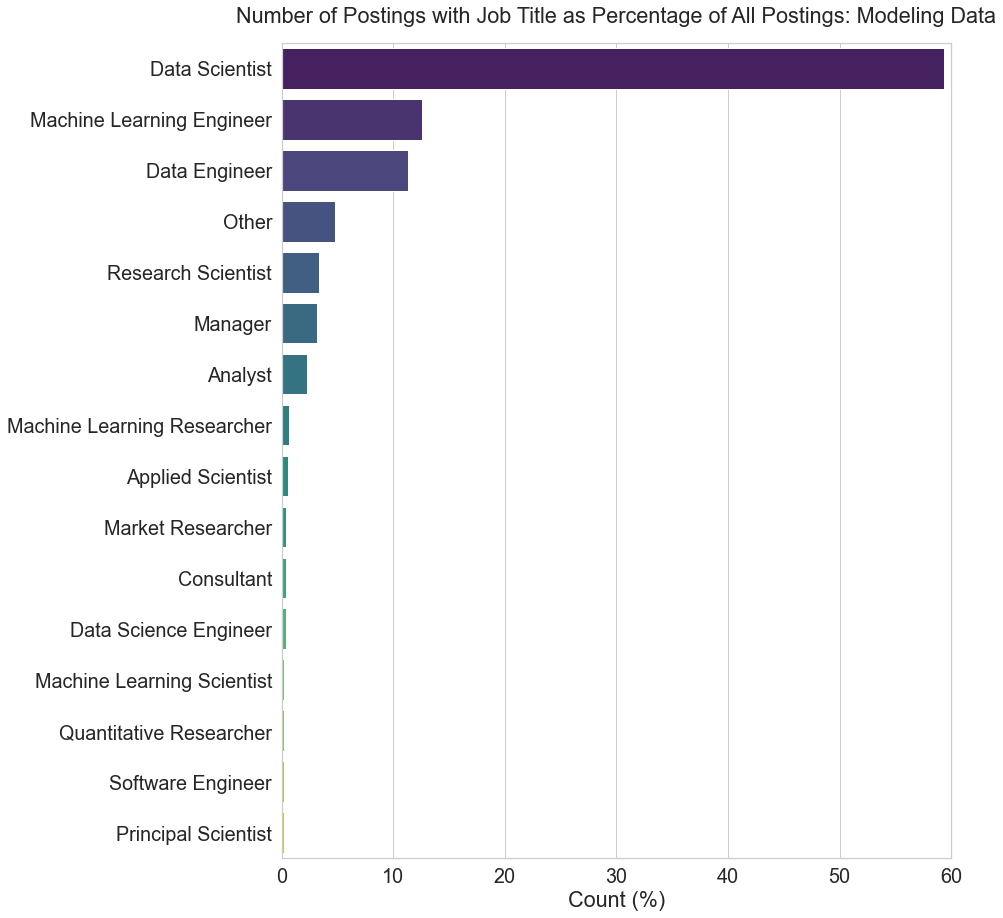

In [136]:
# plot all
plt_pts = len(count_feat)
x_max = 60
d_x = 10
data_name = 'Modeling Data'
plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

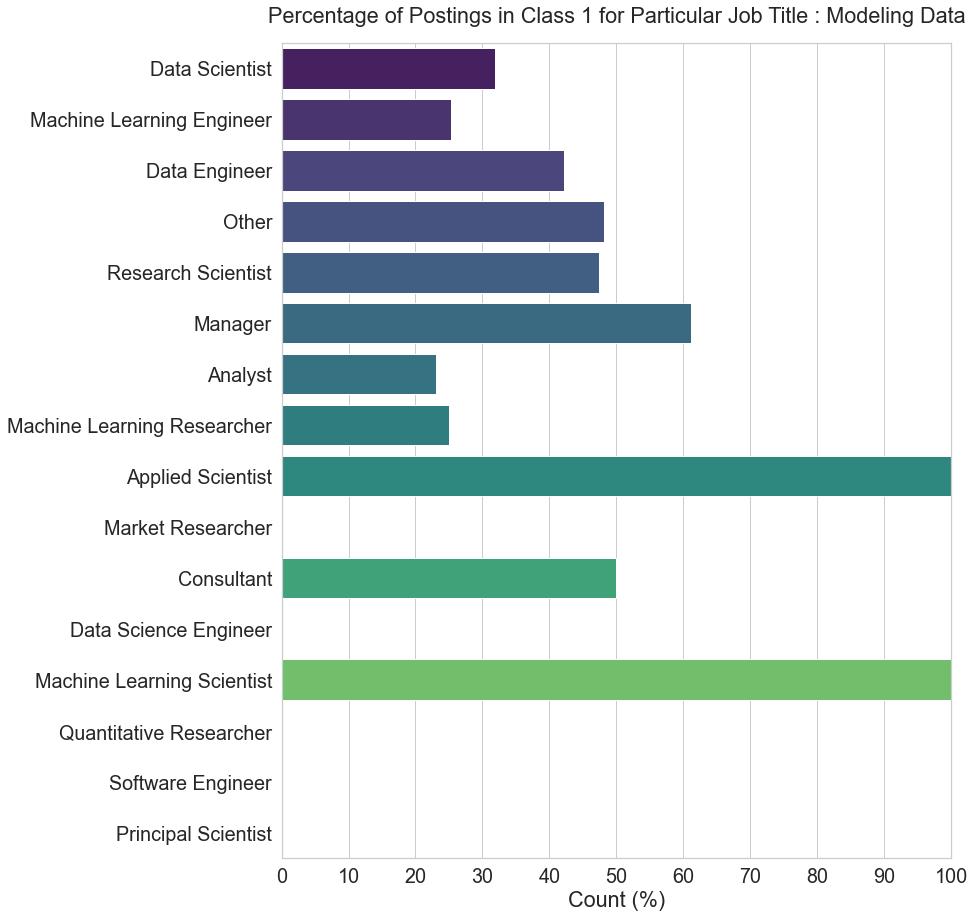

In [137]:
x_max = 100
d_x = 10

plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

In [138]:
# get and print 'Job Title' value count for data_pred_a

data = data_pred_a

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

Data Scientist                 55.094340
Data Engineer                  19.245283
Machine Learning Engineer      13.207547
Other                           4.905660
Research Scientist              3.018868
Consultant                      1.132075
Software Engineer               1.132075
Manager                         0.754717
Machine Learning Researcher     0.377358
Quantitative Researcher         0.377358
Principal Scientist             0.377358
Analyst                         0.377358
Name: Job Title, dtype: float64


Job Title - total number of values:  12


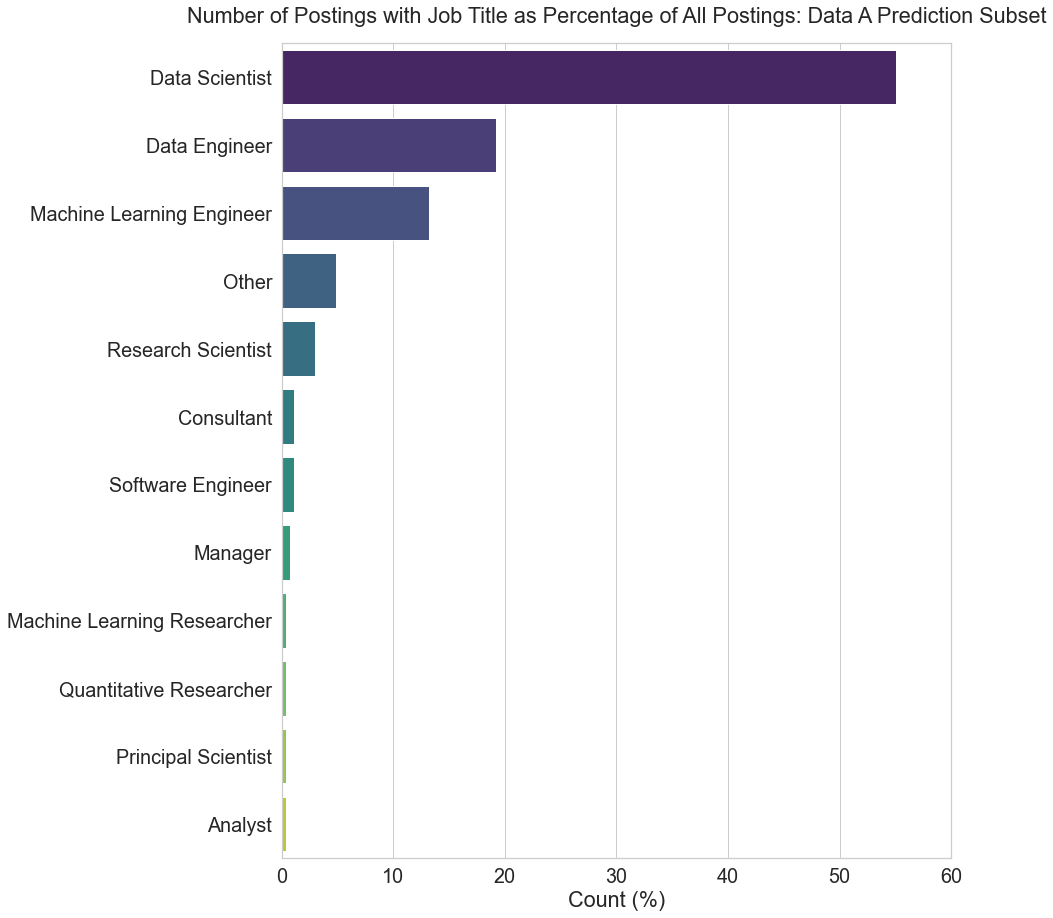

In [139]:
# plot all
plt_pts = len(count_feat)
x_max = 60
data_name = 'Data A Prediction Subset'
plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

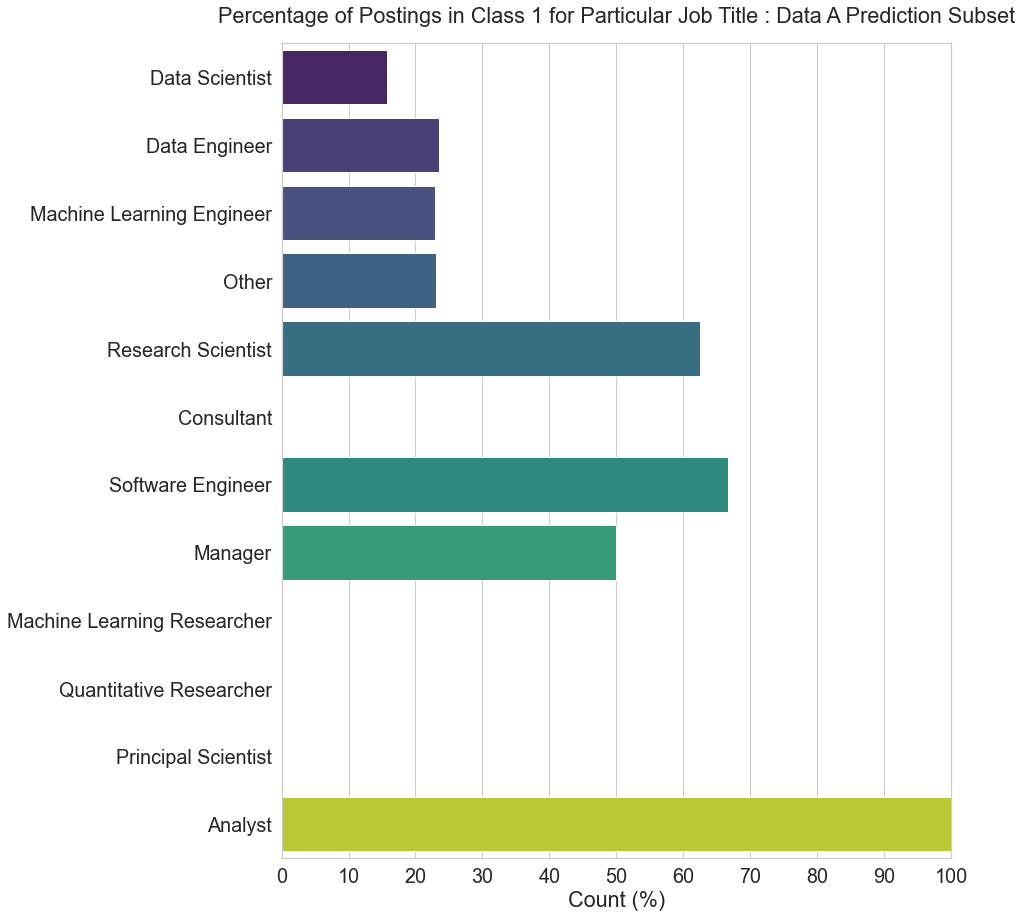

In [140]:
# plot Class 1 percentages
x_max = 100

plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

In [141]:
# get and print 'Job Title' value count for data_pred_b

data = data_pred_b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

Data Scientist                 53.205128
Data Engineer                  18.910256
Machine Learning Engineer      10.470085
Other                           6.837607
Research Scientist              2.564103
Manager                         1.923077
Analyst                         1.495726
Consultant                      1.282051
Applied Scientist               1.175214
Software Engineer               0.854701
Data Science Engineer           0.427350
Machine Learning Scientist      0.427350
Quantitative Researcher         0.320513
Machine Learning Researcher     0.106838
Name: Job Title, dtype: float64


Job Title - total number of values:  14


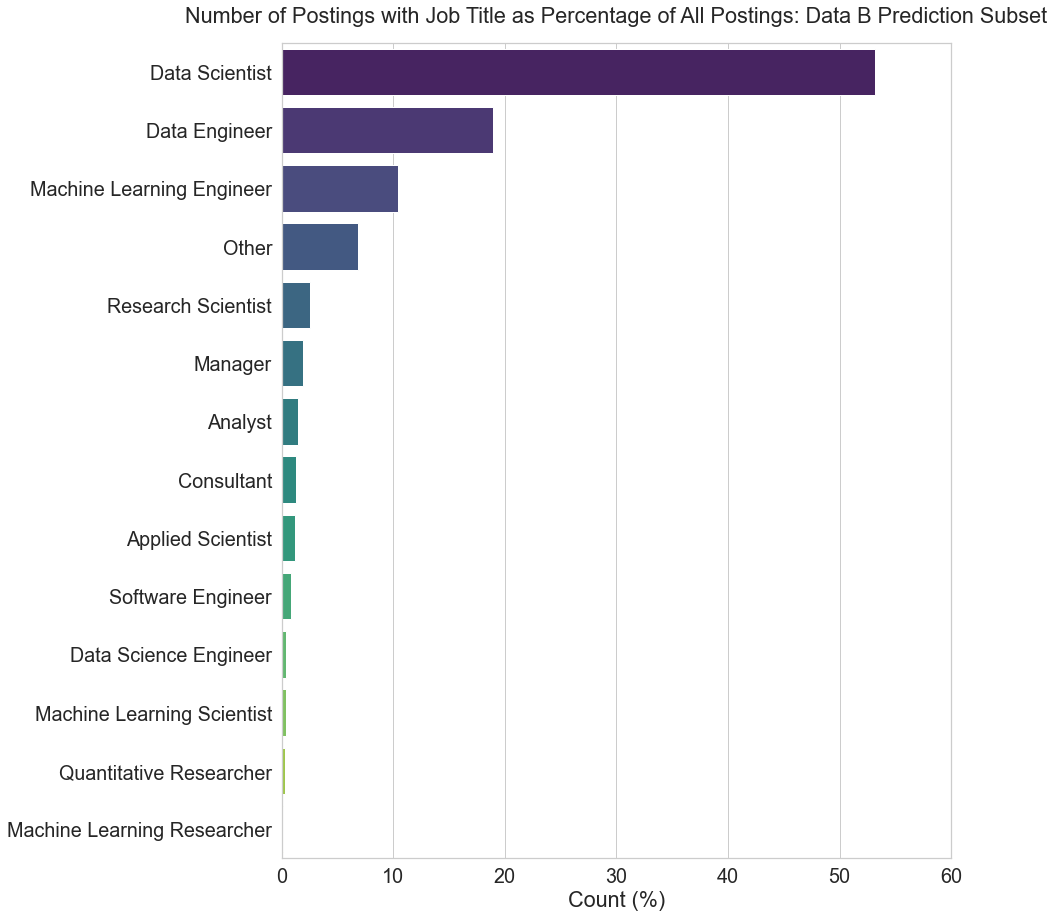

In [142]:
# plot all
plt_pts = len(count_feat)
x_max = 60
data_name = 'Data B Prediction Subset'
plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

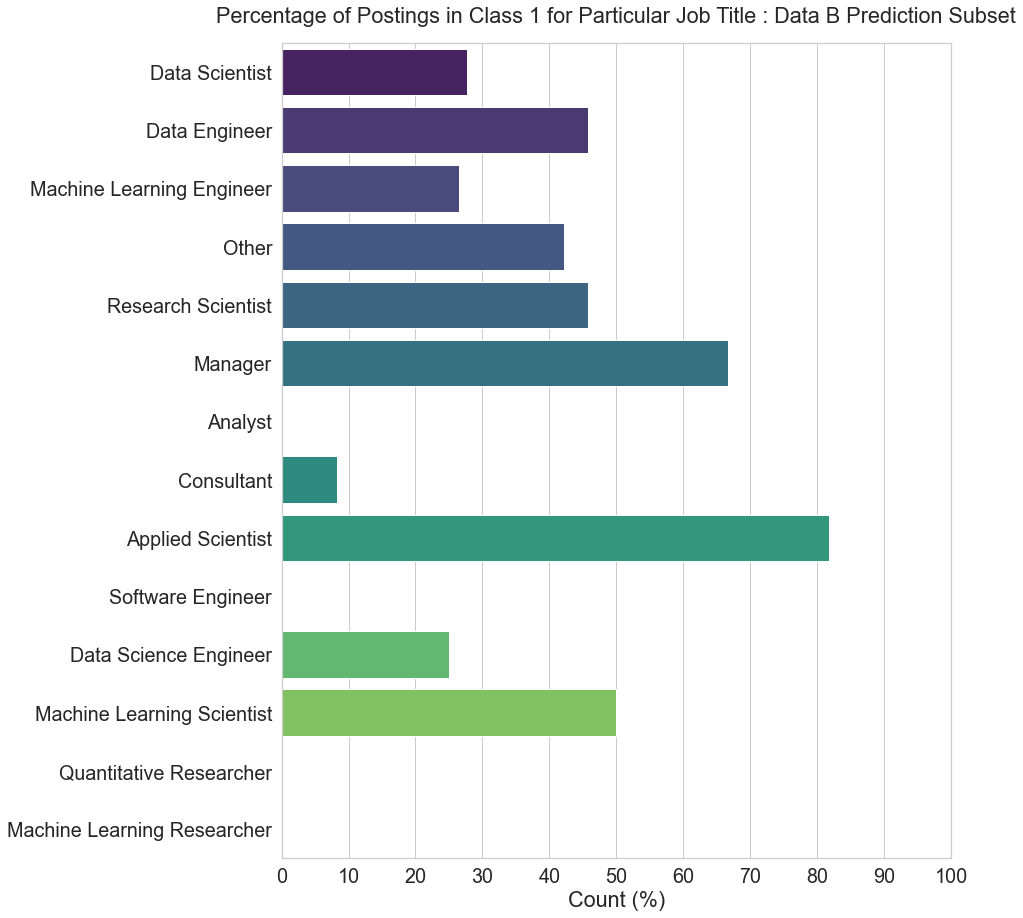

In [143]:
# plot Class 1 percentages
x_max = 100

plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

    - 'Metro Area' comparison

In [144]:
# get and print feature value count for df_m_c1

data = data_m
data_feat = 'Metro Area'
count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

SF     23.758865
NY     15.780142
BOS    10.992908
SEA     7.624113
CHI     7.269504
DC      6.560284
LA      5.141844
ATL     4.078014
AUS     4.078014
DAL     3.191489
SD      2.304965
POR     2.304965
HOU     2.304965
PHI     1.950355
PHX     1.773050
NC      0.886525
Name: Metro Area, dtype: float64


Metro Area - total number of values:  16


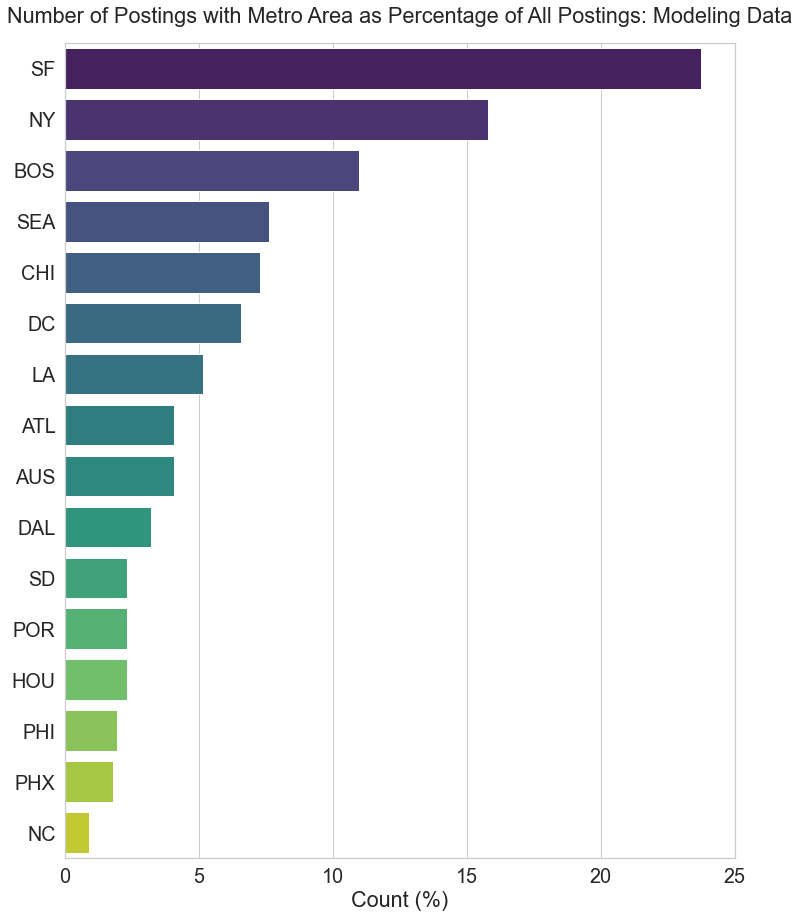

In [145]:
# plot all
plt_pts = len(count_feat)
x_max = 25
d_x = 5
fig_size_y = 15
data_name = 'Modeling Data'

plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

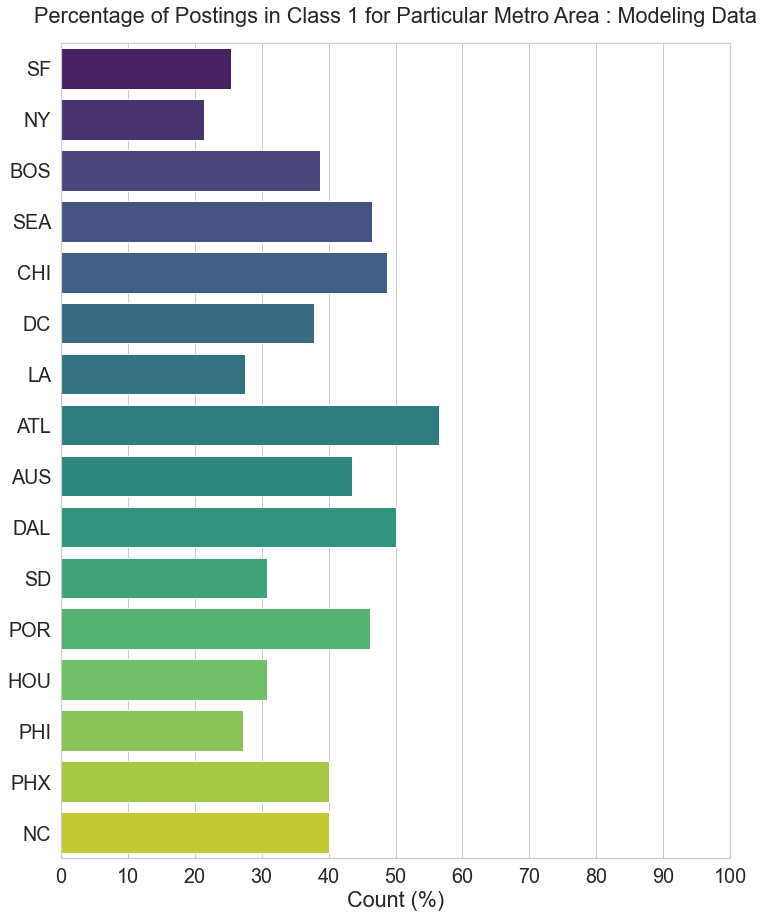

In [146]:
# plot Class 1 percentages
x_max = 100
d_x = 10
plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

In [147]:
# get and print feature value count for data_pred_a

data = data_pred_a

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

SF     21.886792
NY     17.358491
LA     10.188679
BOS     7.924528
DC      7.547170
CHI     7.547170
SEA     4.905660
DAL     4.528302
AUS     3.773585
HOU     3.396226
ATL     3.018868
SD      3.018868
POR     1.509434
PHI     1.509434
PHX     1.132075
NC      0.754717
Name: Metro Area, dtype: float64


Metro Area - total number of values:  16


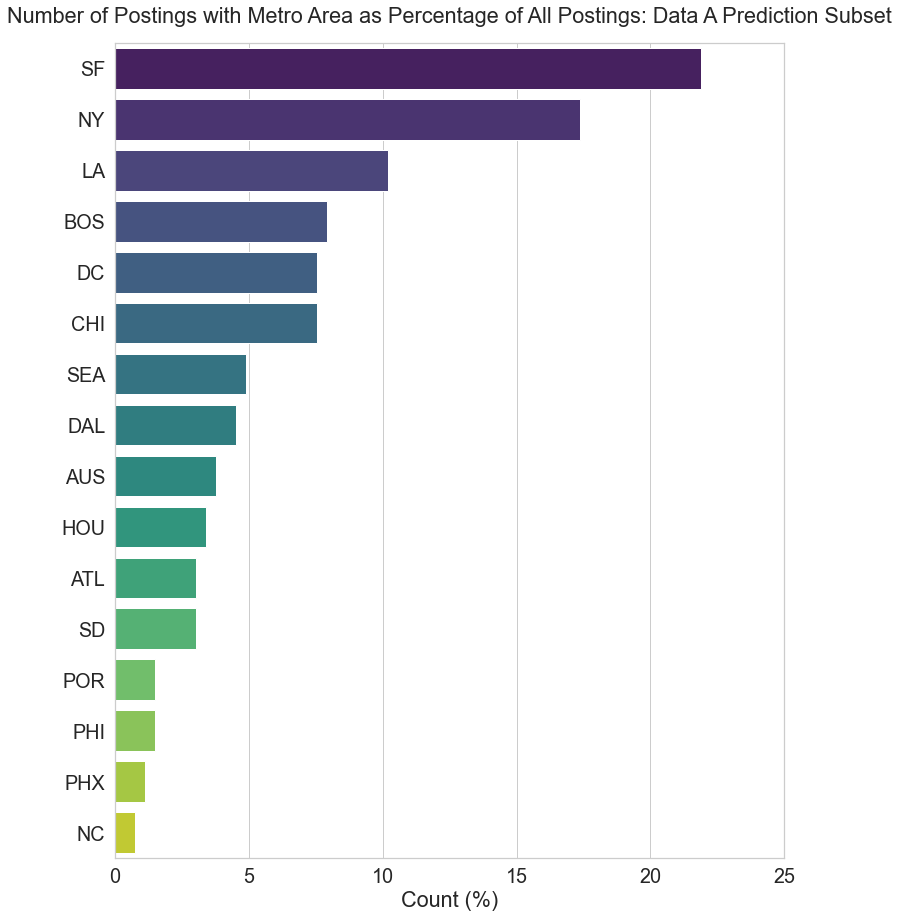

In [148]:
# plot all
plt_pts = len(count_feat)

data_name = 'Data A Prediction Subset'
x_max = 25
d_x = 5
plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

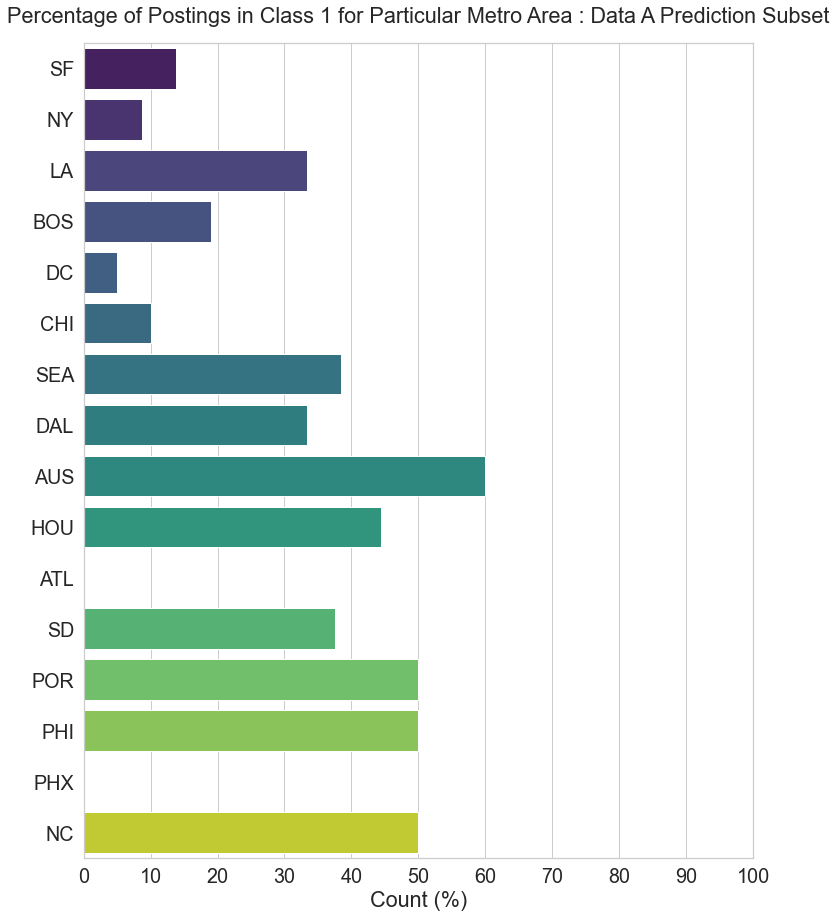

In [149]:
# plot Class 1 percentages
x_max = 100
d_x = 10
plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

In [150]:
# get and print feature value count for data_pred_b

data = data_pred_b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

DC     15.705128
SF     14.316239
NY     11.004274
SEA    10.042735
BOS     8.867521
LA      6.944444
CHI     6.303419
ATL     4.700855
DAL     4.594017
PHI     4.059829
PHX     3.418803
SD      2.991453
POR     2.777778
AUS     2.564103
HOU     1.175214
NC      0.534188
Name: Metro Area, dtype: float64


Metro Area - total number of values:  16


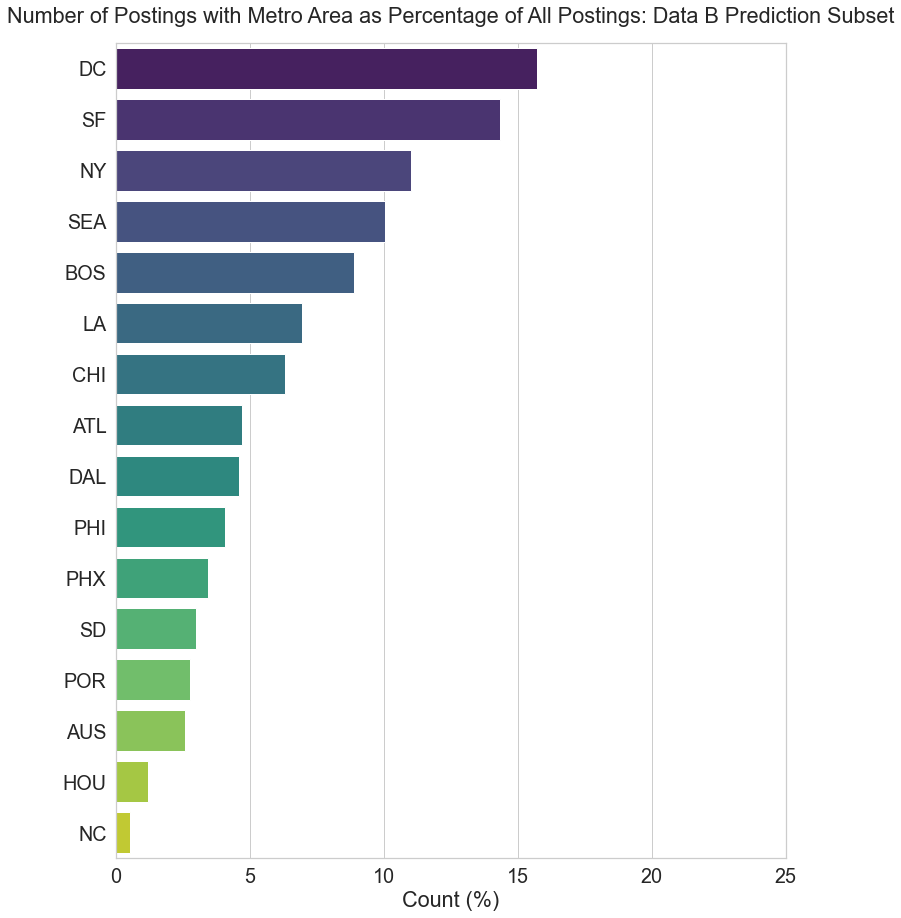

In [151]:
# plot all
plt_pts = len(count_feat)

data_name = 'Data B Prediction Subset'
x_max = 25
d_x = 5
plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

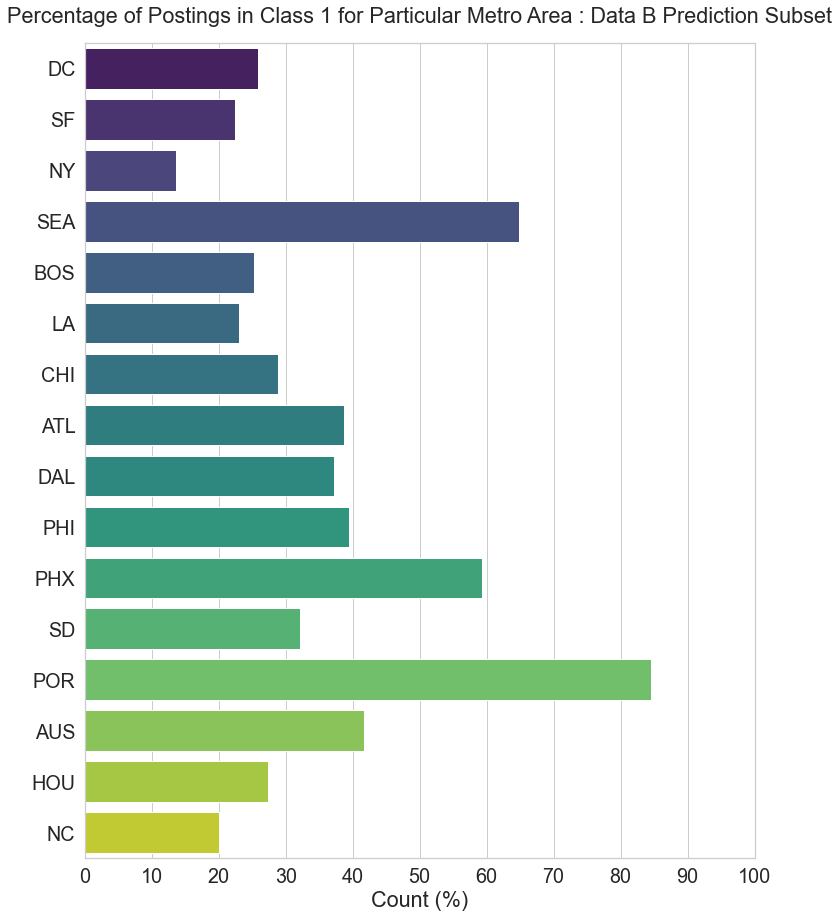

In [152]:
# plot Class 1 percentages
x_max = 100
d_x = 10
plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

        - 'Seniority Level' comparison

In [153]:
# get and print feature value count for df_m_c1

data = data_m
data_feat = 'Seniority Level'
count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

senior       44.326241
entry        35.815603
associate    19.858156
Name: Seniority Level, dtype: float64


Seniority Level - total number of values:  3


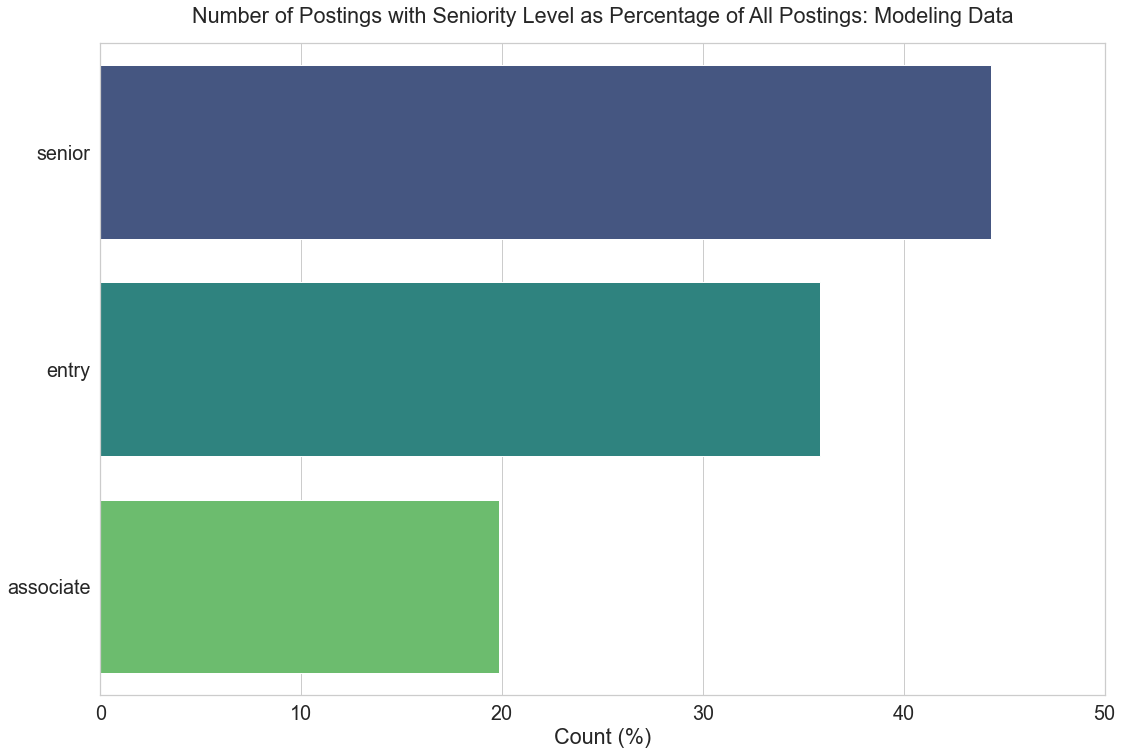

In [154]:
# plot all
plt_pts = len(count_feat)
x_max = 50
d_x = 10
fig_size_x = 18
fig_size_y = 12
legend_box_y = 0.08
data_name = 'Modeling Data'

plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

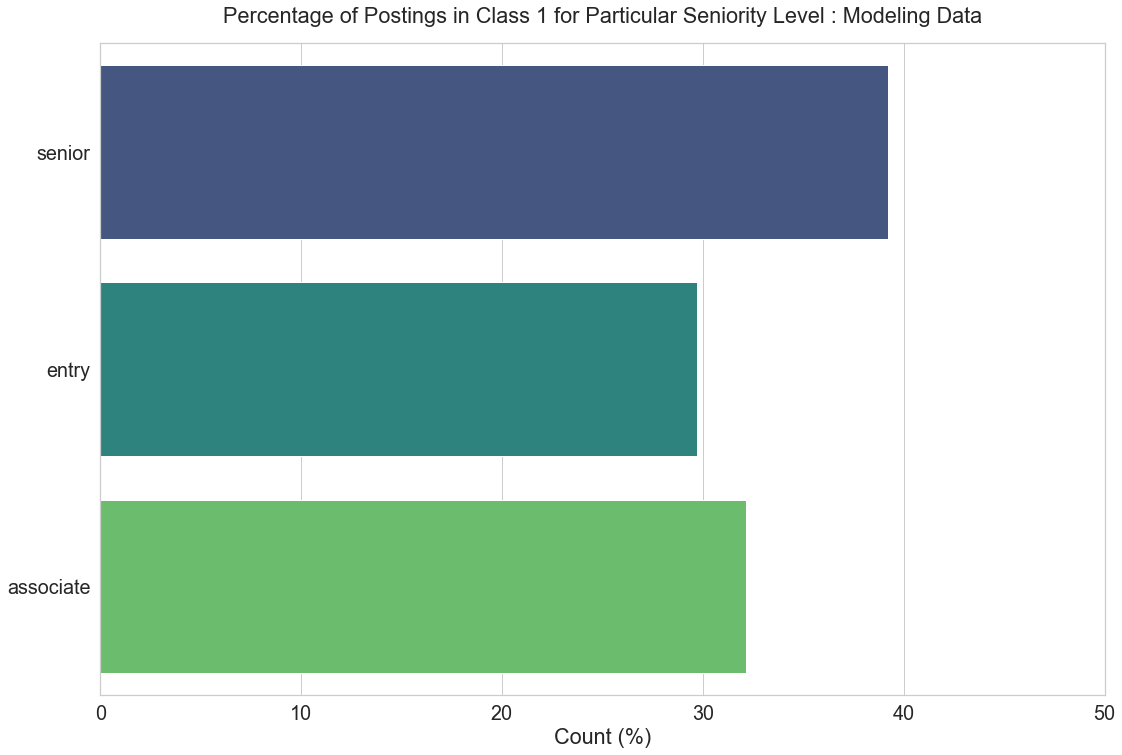

In [155]:
# plot Class 1 percentages
x_max = 50
d_x = 10
plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

In [156]:
# get and print feature value count for data_pred_a

data = data_pred_a

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

senior       46.037736
associate    27.169811
entry        26.792453
Name: Seniority Level, dtype: float64


Seniority Level - total number of values:  3


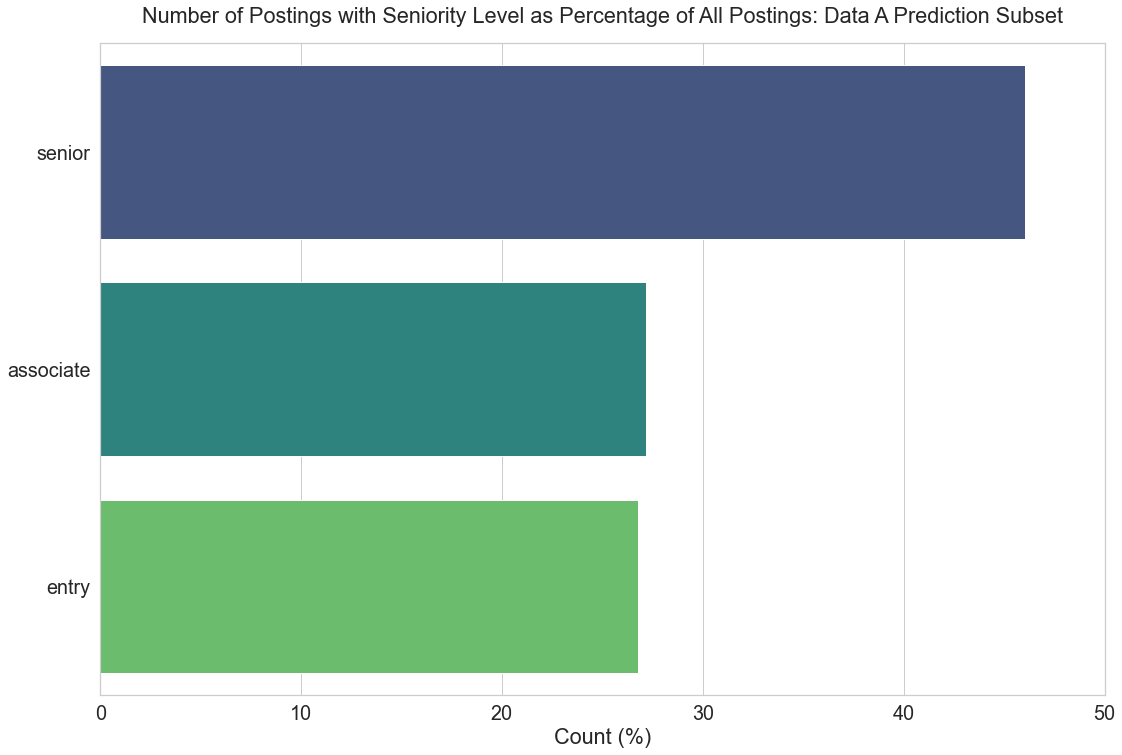

In [157]:
# plot all
plt_pts = len(count_feat)

data_name = 'Data A Prediction Subset'

plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

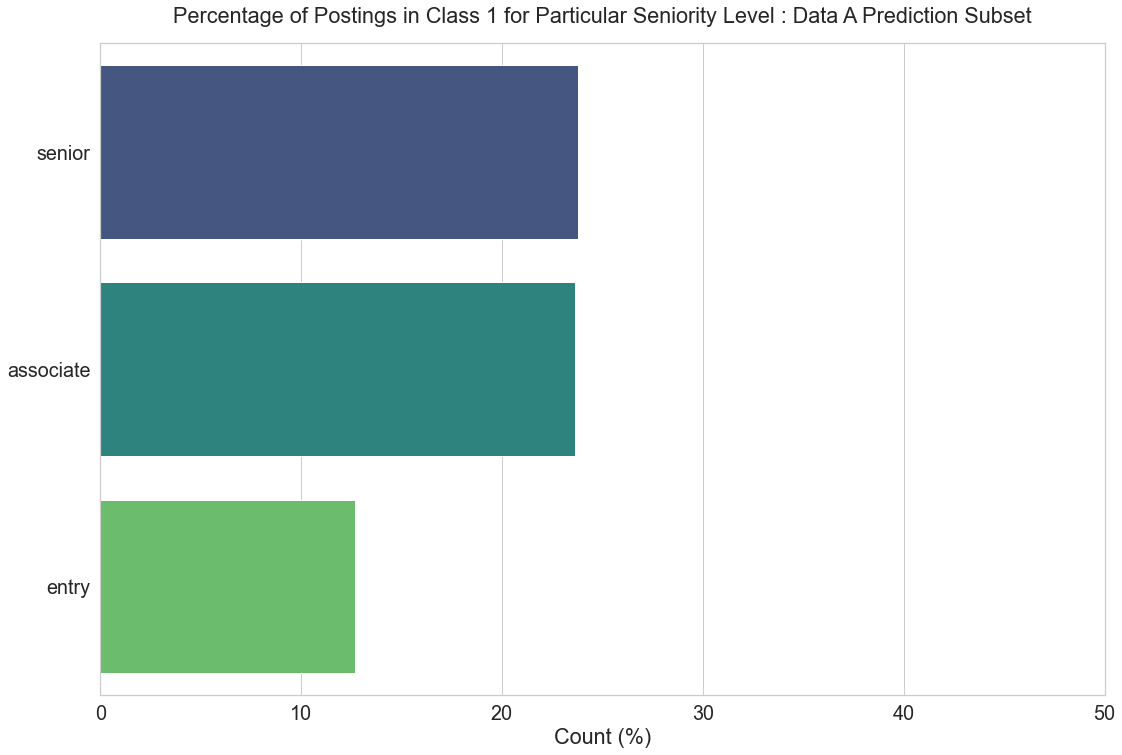

In [158]:
# plot Class 1 percentages
x_max = 50
d_x = 10
plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

In [159]:
# get and print feature value count for data_pred_b

data = data_pred_b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

senior       36.431624
associate    35.576923
entry        27.991453
Name: Seniority Level, dtype: float64


Seniority Level - total number of values:  3


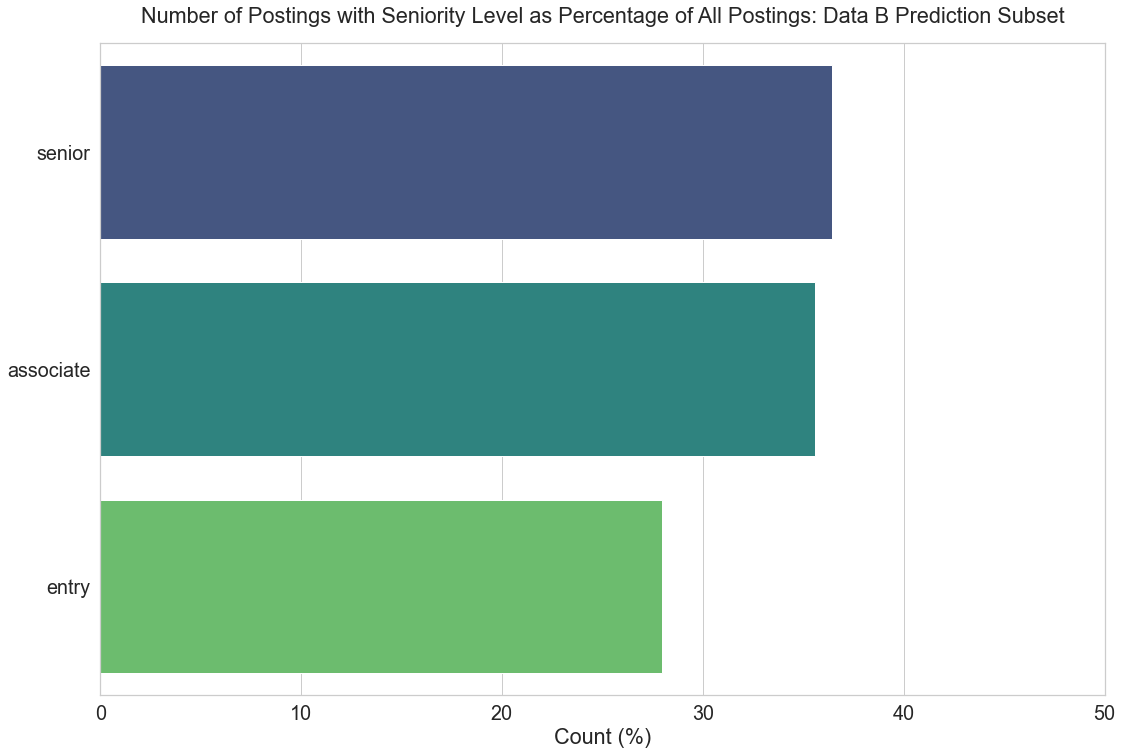

In [160]:
# plot all
plt_pts = len(count_feat)

data_name = 'Data B Prediction Subset'

plot_feat_count(data, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x)

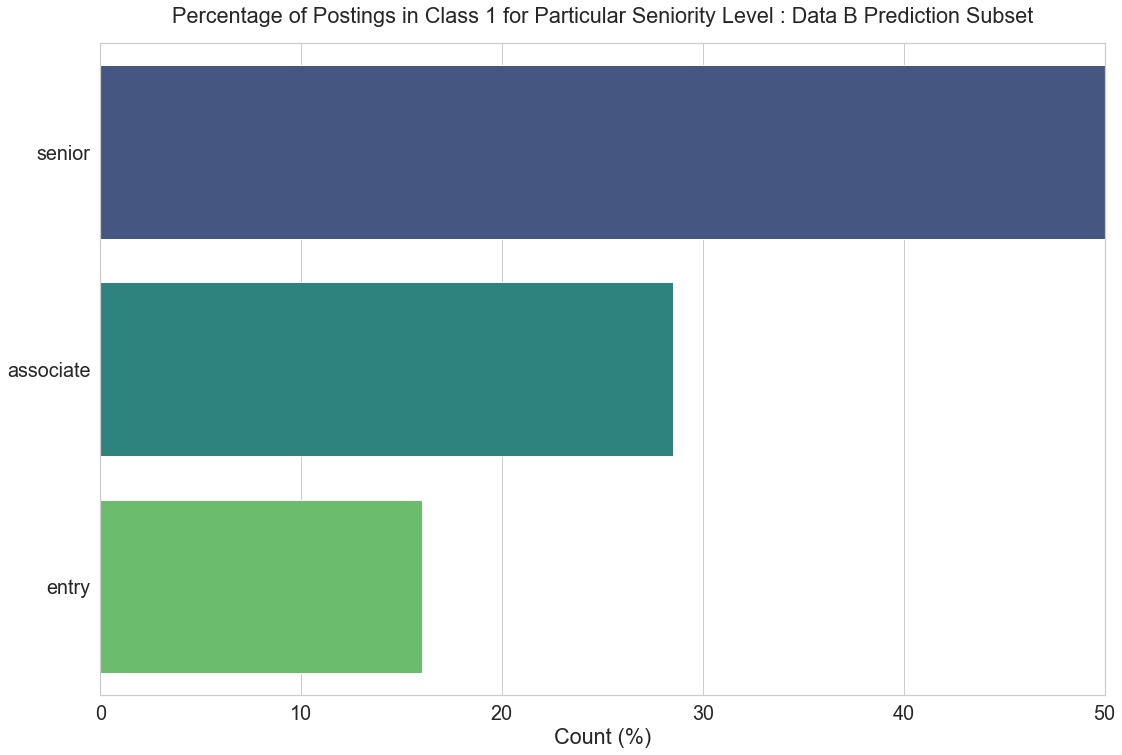

In [161]:
# plot Class 1 percentages
x_max = 50
d_x = 10
plot_feat_count_c1(data, data_feat, data_name, class_feat, class_val, plt_pts, fig_size_x, fig_size_y, x_max, d_x)